# beijing

In [194]:
import requests
start = '2018-04-11-0'
# start = '2018-05-01-0'
end   = '2018-05-18-23'
url = 'https://biendata.com/competition/airquality/bj/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/bj_airquality_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)
print('aq finished!')
url = 'https://biendata.com/competition/meteorology/bj/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/bj_meteorology_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)
print('meo finished!')
url = 'https://biendata.com/competition/meteorology/bj_grid/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)
print('grid finished!')

aq finished!
meo finished!
grid finished!


In [169]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import timedelta
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

def gen_dates(b_date, count):
    hour = timedelta(hours=1)
    for i in range(count+1):
        yield b_date + hour*i


def get_date_list(start=None, end=None):
    """
    获取日期列表
    :param start: 开始日期
    :param end: 结束日期
    :return:
    """
    if start is None:
        start = datetime.strptime("2000-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
    if end is None:
        end = datetime.now()
    data = []
    for d in gen_dates(start, int((end-start).total_seconds()/3600)):
        data.append(str(d))
    return data


Medium_PM10 = 88
Medium_PM25 = 59
Medium_O3   = 56
Medium_NO2  = 46
Medium_CO   = 1
Medium_SO2  = 9
def to_timedict_bj(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('stationId','utc_time','PM2.5','PM10','NO2','CO','O3','SO2'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration','CO_Concentration','O3_Concentration','SO2_Concentration']]).tolist()
    for i in tqdm(['aotizhongxin', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihuayuan', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuiku', 'nansanhuan', 'nongzhanguan', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxigong','xizhimenbei','yanqin','yizhuang','yongdingmennei','yongledian','yufa','yungang']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.reset_index(drop=True,inplace=True)
#     recons.loc[recons['stationId'] == 'zhiwuyuan_aq',['PM2.5','PM10','NO2','CO','O3','SO2']] = [Medium_PM25,Medium_PM10,Medium_NO2,Medium_CO,Medium_O3,Medium_SO2]

#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons['PM2.5'].fillna(Medium_PM25, inplace = True)
    recons['PM10'].fillna(Medium_PM10, inplace = True)
    recons['NO2'].fillna(Medium_NO2, inplace = True)
    recons['CO'].fillna(Medium_CO, inplace = True)
    recons['O3'].fillna(Medium_O3, inplace = True)
    recons['SO2'].fillna(Medium_SO2, inplace = True)
    
    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['stationId']=='dongsi_aq',['lon','lat']] = [116.417,39.929]
    recons.loc[recons['stationId']=='tiantan_aq',['lon','lat']] = [116.407,39.886]
    recons.loc[recons['stationId']=='guanyuan_aq',['lon','lat']] = [116.339,39.929]
    recons.loc[recons['stationId']=='wanshouxigong_aq',['lon','lat']] = [116.352,39.878]
    recons.loc[recons['stationId']=='aotizhongxin_aq',['lon','lat']] = [116.397,39.982]
    recons.loc[recons['stationId']=='nongzhanguan_aq',['lon','lat']] = [116.461,39.937]
    recons.loc[recons['stationId']=='wanliu_aq',['lon','lat']] = [116.287,39.987]
    recons.loc[recons['stationId']=='beibuxinqu_aq',['lon','lat']] = [116.174,40.09]
    recons.loc[recons['stationId']=='zhiwuyuan_aq',['lon','lat']] = [116.207,40.002]
    recons.loc[recons['stationId']=='fengtaihuayuan_aq',['lon','lat']] = [116.279,39.863]
    recons.loc[recons['stationId']=='yungang_aq',['lon','lat']] = [116.146,39.824]
    recons.loc[recons['stationId']=='gucheng_aq',['lon','lat']] = [116.184,39.914]
    recons.loc[recons['stationId']=='fangshan_aq',['lon','lat']] = [116.136,39.742]
    recons.loc[recons['stationId']=='daxing_aq',['lon','lat']] = [116.404,39.718]
    recons.loc[recons['stationId']=='yizhuang_aq',['lon','lat']] = [116.506,39.795]
    recons.loc[recons['stationId']=='tongzhou_aq',['lon','lat']] = [116.663,39.886]
    recons.loc[recons['stationId']=='shunyi_aq',['lon','lat']] = [116.655,40.127]
    recons.loc[recons['stationId']=='pingchang_aq',['lon','lat']] = [116.23,40.217]
    recons.loc[recons['stationId']=='mentougou_aq',['lon','lat']] = [116.106,39.937]
    recons.loc[recons['stationId']=='pinggu_aq',['lon','lat']] = [117.1,40.143]
    recons.loc[recons['stationId']=='hureconsou_aq',['lon','lat']] = [116.628,40.328]
    recons.loc[recons['stationId']=='miyun_aq',['lon','lat']] = [116.832,40.37]
    recons.loc[recons['stationId']=='yanqin_aq',['lon','lat']] = [115.972,40.453]
    recons.loc[recons['stationId']=='dingling_aq',['lon','lat']] = [116.22,40.292]
    recons.loc[recons['stationId']=='badaling_aq',['lon','lat']] = [115.988,40.365]
    recons.loc[recons['stationId']=='miyunshuiku_aq',['lon','lat']] = [116.911,40.499]
    recons.loc[recons['stationId']=='donggaocun_aq',['lon','lat']] = [117.12,40.1]
    recons.loc[recons['stationId']=='yongledian_aq',['lon','lat']] = [116.783,39.712]
    recons.loc[recons['stationId']=='yufa_aq',['lon','lat']] = [116.3,39.52]
    recons.loc[recons['stationId']=='liulihe_aq',['lon','lat']] = [116,39.58]
    recons.loc[recons['stationId']=='qianmen_aq',['lon','lat']] = [116.395,39.899]
    recons.loc[recons['stationId']=='yongdingmennei_aq',['lon','lat']] = [116.394,39.876]
    recons.loc[recons['stationId']=='xizhimenbei_aq',['lon','lat']] = [116.349,39.954]
    recons.loc[recons['stationId']=='nansanhuan_aq',['lon','lat']] = [116.368,39.856]
    recons.loc[recons['stationId']=='dongsihuan_aq',['lon','lat']] = [116.483,39.939]
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5','PM10','NO2','CO','O3','SO2']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
        
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 272:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    ######################处理缺失时间点完毕#####################shunyi_meo


    recons_meo = pd.DataFrame(columns=('station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather'))

    alt = np.array(meo[['station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    for i in tqdm(['shunyi_meo','hadian_meo','yanqing_meo','miyun_meo','huairou_meo','shangdianzi_meo','pinggu_meo','tongzhou_meo','chaoyang_meo','pingchang_meo','zhaitang_meo','mentougou_meo','beijing_meo','shijingshan_meo','fengtai_meo','daxing_meo','fangshan_meo','xiayunling_meo']):
        count = 0
        for j in meo['station_id']:
            if j == i:
                recons_meo.loc[count] = alt[count]
            count += 1 
    
    for i in range(len(recons_meo['wind_speed'])):
        if recons_meo['wind_speed'][i] == 999017:
            recons_meo.loc[i,'wind_speed'] = recons_meo.loc[i-1,'wind_speed']
    recons_meo['longitude'] = 0 ##经度
    recons_meo['latitude'] = 0  ##纬度
    recons_meo.loc[recons_meo['station_id']=='shunyi_meo',['longitude','latitude']] = [116.6153,40.12667]
    recons_meo.loc[recons_meo['station_id']=='haidian_meo',['longitude','latitude']] = [116.2906,39.98694]
    recons_meo.loc[recons_meo['station_id']=='yanqing_meo',['longitude','latitude']] = [115.9689,40.44944]
    recons_meo.loc[recons_meo['station_id']=='miyun_meo',['longitude','latitude']] = [116.8642,40.3775]
    recons_meo.loc[recons_meo['station_id']=='huairou_meo',['longitude','latitude']] = [116.6269,40.35778]
    recons_meo.loc[recons_meo['station_id']=='shangdianzi_meo',['longitude','latitude']] = [117.1117,40.65889]
    recons_meo.loc[recons_meo['station_id']=='pinggu_meo',['longitude','latitude']] = [117.1178,40.16944]
    recons_meo.loc[recons_meo['station_id']=='tongzhou_meo',['longitude','latitude']] = [116.7567,39.8475]
    recons_meo.loc[recons_meo['station_id']=='chaoyang_meo',['longitude','latitude']] = [116.5008,39.9525]
    recons_meo.loc[recons_meo['station_id']=='pingchang_meo',['longitude','latitude']] = [116.2117,40.22333]
    recons_meo.loc[recons_meo['station_id']=='zhaitang_meo',['longitude','latitude']] = [115.6922,39.97389]
    recons_meo.loc[recons_meo['station_id']=='mentougou_meo',['longitude','latitude']] = [116.1564,39.88778]
    recons_meo.loc[recons_meo['station_id']=='beijing_meo',['longitude','latitude']] = [116.4694,39.80611]
    recons_meo.loc[recons_meo['station_id']=='shijingshan_meo',['longitude','latitude']] = [116.2053,39.9425]
    recons_meo.loc[recons_meo['station_id']=='fengtai_meo',['longitude','latitude']] = [116.2453,39.87028]
    recons_meo.loc[recons_meo['station_id']=='daxing_meo',['longitude','latitude']] = [116.3544,39.71861]
    recons_meo.loc[recons_meo['station_id']=='fangshan_meo',['longitude','latitude']] = [116.1942,39.77306]
    recons_meo.loc[recons_meo['station_id']=='xiayunling_meo',['longitude','latitude']] = [115.7406,39.72861]

    recons_meo.loc[meo['weather'] == 'Sunny/clear' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Snow' , 'weather'] = 1
    recons_meo.loc[meo['weather'] == 'Sleet' , 'weather'] = 2
    recons_meo.loc[meo['weather'] == 'Sand' , 'weather'] = 3
    recons_meo.loc[meo['weather'] == 'Rain/Snow with Hail' , 'weather'] = 4
    recons_meo.loc[meo['weather'] == 'Rain with Hail' , 'weather'] = 5
    recons_meo.loc[meo['weather'] == 'Rain' , 'weather'] = 6
    recons_meo.loc[meo['weather'] == 'Haze' , 'weather'] = 7
    recons_meo.loc[meo['weather'] == 'Fog' , 'weather'] = 8
    recons_meo.loc[meo['weather'] == 'Dust' , 'weather'] = 9
    recons_meo.loc[meo['weather'] == 'Hail' , 'weather'] = 4
    recons_meo.loc[meo['weather'] == 'Cloudy' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Overcast' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Thundershower' , 'weather'] = 6
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    recons_meo['temperature'] = recons_meo['temperature'].apply(div5)
    recons_meo['pressure'] = recons_meo['pressure'].apply(div5)
    recons_meo['humidity'] = recons_meo['humidity'].apply(div5)
    recons_meo['wind_direction'] = recons_meo['wind_direction'].apply(div15)
    recons_meo['wind_speed'] = recons_meo['wind_speed'].apply(div05)
    #############wether量化###############

    #############处理缺失时间点##########
    count = 0
    Idx = 0  ####索引记录####
    meo_list = np.array(recons_meo[['temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    

    for i in tqdm(np.array(recons_meo['time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(meo_list[Idx])

        Idx += 1
        
    length = []  
    
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    ######################处理缺失时间点完毕#####################
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(1150,1181,1):
        for j in range(390,411,1):
            if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                meo_grid.loc[meo_grid['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                 print([i,j])
            count += 1
    
    meo_grid.drop(meo_grid[meo_grid['longitude'] < 115.6].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] > 117.2].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 39.5].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 40.7].index.tolist(),inplace= True)
    meo_grid.drop('id',axis = 1)
    meo_grid.drop_duplicates(inplace=True)
    meo_grid.reset_index(drop=True,inplace=True)
#     print(meo_grid.head(100))
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
    
    
    
    
    count = 1
    Idx = 0  ####索引记录####

    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 9:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1])
            if count > 9:
                for j in range(count-9):
                    alt_dict[i].extend(meo_grid_list[Idx+1])
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
        
        
        
        
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) != 1485:
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
            
            
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(1150,1181,1):
            for j in range(390,411,1):
                if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                    weather_fore.loc[weather_fore['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < 115.6].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 117.2].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 39.5].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 40.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 12093:
            pop_list.append(k)
    print(pop_list)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(12093-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(1485,12093))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))])
            alt_dict[i][1485:12093] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))]).tolist()
        count += 1
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 16
#     win = 168
    
    for i in tqdm(range(68,272)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 271:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,10,11,12]: #####是否为早晚高峰时段（北京转utc时间）
                        alt_dict[alt_frame.index[count]].extend([2])
                    elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [16,17,18,19,20]:
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,6):
            SUM = 0
            for j in range(0,34):
                SUM += alt_dict[k][68+j*6+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0,0,0,0])
        else:
            for m,n in zip(alt_dict[k][-6:] ,alt_dict[hour_last][-12:-6]):
                alt_dict[k].append(m-n)

        hour_last = k
        count += 1
    ##########标签值 PM10 PM2.5 O3##########
#     step = 72  ####预测间隔
    step = 60
    for i in tqdm(range(68,272)):  ##训练数据
        count = 0
        for j in alt_frame[i]:
            if count+step < len(alt_frame[i]) and ((i-68)%6 == 0 or (i-68)%6 == 1 or (i-68)%6 == 4):
                alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
            count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 4973:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i]) <  max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [170]:
Start = datetime.strptime("2018-05-01 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-18 23:00:00", "%Y-%m-%d %H:%M:%S")

pre_dict_bj = to_timedict_bj(start = Start, end = End)
pre_frame_bj = pd.DataFrame.from_dict(pre_dict_bj).T
pre_list_bj = np.array(pre_frame_bj)

  0%|          | 0/18 [00:00<?, ?it/s]

272
272


100%|██████████| 7553/7553 [00:00<00:00, 1093757.01it/s]


380
272
380
380


  0%|          | 0/432 [00:00<?, ?it/s]

1485
380
1485
1485


100%|██████████| 432/432 [07:29<00:00,  1.04s/it]


['2018-05-05 19:00:00', '2018-05-05 14:00:00', '2018-05-03 18:00:00', '2018-05-05 15:00:00', '2018-05-07 09:00:00', '2018-05-05 18:00:00', '2018-05-05 11:00:00', '2018-05-05 10:00:00', '2018-05-05 12:00:00', '2018-05-03 19:00:00', '2018-05-05 16:00:00', '2018-05-05 20:00:00', '2018-05-05 21:00:00', '2018-05-10 20:00:00', '2018-05-05 22:00:00', '2018-05-05 13:00:00', '2018-05-03 20:00:00', '2018-05-05 17:00:00', '2018-05-05 23:00:00']
12093
1485


100%|██████████| 204/204 [00:00<00:00, 253.41it/s]


22002
12207
22002
22002


In [171]:
pre_list_bj.shape

(312, 22002)

In [172]:
pre_frame_bj.index

Index(['2018-05-03 00:00:00', '2018-05-03 01:00:00', '2018-05-03 02:00:00',
       '2018-05-03 03:00:00', '2018-05-03 04:00:00', '2018-05-03 05:00:00',
       '2018-05-03 06:00:00', '2018-05-03 07:00:00', '2018-05-03 08:00:00',
       '2018-05-03 09:00:00',
       ...
       '2018-05-15 14:00:00', '2018-05-15 15:00:00', '2018-05-15 16:00:00',
       '2018-05-15 17:00:00', '2018-05-15 18:00:00', '2018-05-15 19:00:00',
       '2018-05-15 20:00:00', '2018-05-15 21:00:00', '2018-05-15 22:00:00',
       '2018-05-15 23:00:00'],
      dtype='object', length=312)

In [173]:
pre_frame_bj.to_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/bj.csv')

# London

In [195]:
# start = '2018-05-01-0'
start = '2018-04-12-0'
end   = '2018-05-18-23'
url = 'https://biendata.com/competition/airquality/ld/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/ld_airquality_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)
print('aq finished!')

url = 'https://biendata.com/competition/meteorology/ld_grid/'+start +'/'+end+'/2k0d1d8'
respones= requests.get(url)
with open ('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_'+start +'_'+end+'.csv','w') as f:
    f.write(respones.text)
print('grid finished!')

aq finished!
grid finished!


In [174]:
Medium_PM10 = 13.437369
Medium_PM25 = 20.921357
Medium_O3   = 43.428245

def to_timedict_ld(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid.drop('id',axis=1, inplace = True)
    meo_grid.drop_duplicates(inplace = True)
    meo_grid.reset_index(drop = True, inplace =True)
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('station_id','MeasurementDateGMT','PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration']]).tolist()
    for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.drop_duplicates(inplace = True)
    recons.reset_index(drop=True,inplace=True)
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['station_id'] == 'TH4' , 'NO2 (ug/m3)'])
    recons['PM2.5 (ug/m3)'].fillna(Medium_PM25, inplace = True)
    recons['PM10 (ug/m3)'].fillna(Medium_PM10, inplace = True)
    recons['NO2 (ug/m3)'].fillna(Medium_NO2, inplace = True)

    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='CD9',['lon','lat']] = [-0.129053205,51.52770662]
    recons.loc[recons['station_id']=='CD1',['lon','lat']] = [-0.175284,51.544219]
    recons.loc[recons['station_id']=='GN0',['lon','lat']] = [0.074003,51.490532]
    recons.loc[recons['station_id']=='GR4',['lon','lat']] = [0.070766,51.45258]
    recons.loc[recons['station_id']=='GN3',['lon','lat']] = [0.095111,51.486957]
    recons.loc[recons['station_id']=='GR9',['lon','lat']] = [0.040725,51.456357]
    recons.loc[recons['station_id']=='HV1',['lon','lat']] = [0.205460706,51.52078746]
    recons.loc[recons['station_id']=='KF1',['lon','lat']] = [-0.21349214,51.52104675]
    recons.loc[recons['station_id']=='LW2',['lon','lat']] = [-0.039641,51.474954]
    recons.loc[recons['station_id']=='ST5',['lon','lat']] = [-0.141661525,51.3892869]
    recons.loc[recons['station_id']=='TH4',['lon','lat']] = [-0.008418493,51.51504617]
    recons.loc[recons['station_id']=='MY7',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.15459,51.52254]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))

    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(-20,21,1):
        for j in range(505,526,1):
            if (i >= -4 and i <=3) and (j >= 513 and j <= 517):
                meo_grid.loc[meo_grid['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
            count += 1
#     print(meo_grid)
    meo_grid.drop(meo_grid[meo_grid['longitude'] < -0.4].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] >  0.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 51.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 51.7].index.tolist(),inplace= True)
    meo_grid.reset_index(drop = True,inplace = True)
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
#     print(meo_grid)
    count = 1
    Idx = 0  ####索引记录####
#     print(meo_grid['station_id'][15561])
    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 17:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1]) 
            if count > 17:
                for j in range(count-17):
                    alt_dict[i].extend(meo_grid_list[Idx+1]) 
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 2217:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0])!= 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace=True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(-20,21,1):
            for j in range(505,526,1):
                if (i >= -4 and i <= 3) and (j >= 513 and j <= 517):
                    weather_fore.loc[weather_fore['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < -0.4].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 0.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 51.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 51.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 2185:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(2185-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(265,2185))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))])
            alt_dict[i][265:2185] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))]).tolist()
        count += 1
#     print(alt_frame[62])
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 168

    for i in tqdm(range(26,65)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 64:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
#                     if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [8,9,10,18,19,20]: #####是否为早晚高峰时段（北京转utc时间）
#                         alt_dict[alt_frame.index[count]].extend([2])
#                     elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,3,4,5]:
#                         alt_dict[alt_frame.index[count]].extend([1])
#                     else:
#                         alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,3):
            SUM = 0
            for j in range(0,13):
                SUM += alt_dict[k][26+j*3+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0])
        else:
            for m,n in zip(alt_dict[k][-3:] ,alt_dict[hour_last][-6:-3]):
                alt_dict[k].append(m-n)
        hour_last = k
        count += 1
    ##########标签值 PM10 PM2.5 O3##########
    step = 72
    for i in tqdm(range(26,65)):  ##训练数据
        count = 0
        for j in alt_frame[i]:
            if count+step < len(alt_frame[i]) and ((i-26)%3 == 0 or (i-26)%3 == 1):
                alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
            count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 6092:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
            
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i])<max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [175]:
Start = datetime.strptime("2018-05-01 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-18 23:00:00", "%Y-%m-%d %H:%M:%S")
pre_dict_ld = to_timedict_ld(start = Start, end = End)
pre_frame_ld = pd.DataFrame.from_dict(pre_dict_ld).T
pre_list_ld = np.array(pre_frame_ld)

100%|██████████| 5610/5610 [00:00<00:00, 866700.26it/s]


65
50
65
65


  0%|          | 0/432 [00:00<?, ?it/s]

265
65


 21%|██        | 8/39 [00:00<00:00, 33.94it/s]

2185
65


100%|██████████| 39/39 [00:00<00:00, 209.70it/s]


4091
2217
4091
4091


In [176]:
pre_list_ld.shape

(312, 4091)

In [177]:
pre_frame_ld.index

Index(['2018-05-03 00:00:00', '2018-05-03 01:00:00', '2018-05-03 02:00:00',
       '2018-05-03 03:00:00', '2018-05-03 04:00:00', '2018-05-03 05:00:00',
       '2018-05-03 06:00:00', '2018-05-03 07:00:00', '2018-05-03 08:00:00',
       '2018-05-03 09:00:00',
       ...
       '2018-05-15 14:00:00', '2018-05-15 15:00:00', '2018-05-15 16:00:00',
       '2018-05-15 17:00:00', '2018-05-15 18:00:00', '2018-05-15 19:00:00',
       '2018-05-15 20:00:00', '2018-05-15 21:00:00', '2018-05-15 22:00:00',
       '2018-05-15 23:00:00'],
      dtype='object', length=312)

In [178]:
pre_frame_ld.to_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/ld.csv')

In [179]:
import pandas as pd
import numpy as np
beijing_train = np.array(pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/bj.csv'))[:,1:]
London_train = np.array(pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/traindata/ld.csv'))[:,1:]
def sMAPE(preds, xgb_train):   
    s = 0
    label = xgb_train.get_label()
    length = len(label)
    for i in range(length):
        s += float(np.abs(preds[i] - label[i]))/ (float(np.abs(preds[i]) + np.abs(label[i])) / 2.)
    sMAPE = s/float(length)
    return 'sMAPE',float(sMAPE)

# MODEL BJ

In [180]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
train_data, val_data = train_test_split(beijing_train, test_size = 0.3, random_state = 1)###随机数原始为1
# train_data, val_data = beijing_train[:-48,:], beijing_train[-48:,:]###随机数原始为1

In [413]:
a = 64
b= np.abs(a)
print(type(a))
print(type(b))
print(type(float(b)))

<class 'int'>
<class 'numpy.int64'>
<class 'float'>


# PM2.5

  0%|          | 0/34 [00:00<?, ?it/s]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:130.449	val-gamma-nloglik:123.194	train-sMAPE:1.9561	val-sMAPE:1.95512
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.09202	val-gamma-nloglik:5.06996	train-sMAPE:0.009205	val-sMAPE:0.131921
[200]	train-gamma-nloglik:5.09196	val-gamma-nloglik:5.06942	train-sMAPE:0.000395	val-sMAPE:0.129787
Stopping. Best iteration:
[220]	train-gamma-nloglik:5.09196	val-gamma-nloglik:5.06942	train-sMAPE:0.000379	val-sMAPE:0.129784



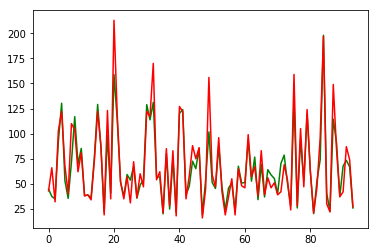

  3%|▎         | 1/34 [00:08<04:49,  8.78s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:129.159	val-gamma-nloglik:118.747	train-sMAPE:1.95478	val-sMAPE:1.95235
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.08321	val-gamma-nloglik:5.04282	train-sMAPE:0.008388	val-sMAPE:0.153779
[200]	train-gamma-nloglik:5.08315	val-gamma-nloglik:5.04246	train-sMAPE:0.000361	val-sMAPE:0.15231
Stopping. Best iteration:
[184]	train-gamma-nloglik:5.08315	val-gamma-nloglik:5.04246	train-sMAPE:0.000385	val-sMAPE:0.152307



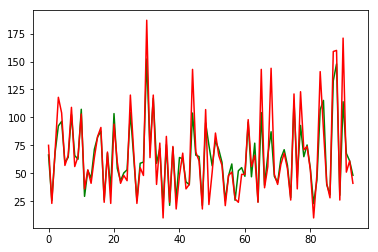

  6%|▌         | 2/34 [00:16<04:23,  8.24s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:116.934	val-gamma-nloglik:105.792	train-sMAPE:1.94807	val-sMAPE:1.93584
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.97145	val-gamma-nloglik:4.9039	train-sMAPE:0.008172	val-sMAPE:0.152618
[200]	train-gamma-nloglik:4.9714	val-gamma-nloglik:4.9037	train-sMAPE:0.000427	val-sMAPE:0.151355
Stopping. Best iteration:
[191]	train-gamma-nloglik:4.9714	val-gamma-nloglik:4.9037	train-sMAPE:0.000485	val-sMAPE:0.151347



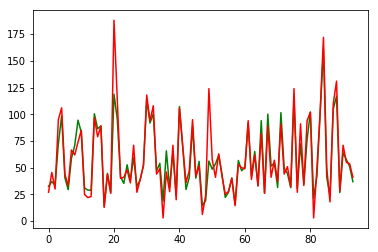

  9%|▉         | 3/34 [00:24<04:12,  8.15s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:117.553	val-gamma-nloglik:120.16	train-sMAPE:1.95009	val-sMAPE:1.95272
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.98167	val-gamma-nloglik:5.03612	train-sMAPE:0.009092	val-sMAPE:0.168933
[200]	train-gamma-nloglik:4.98161	val-gamma-nloglik:5.0356	train-sMAPE:0.000461	val-sMAPE:0.166864
Stopping. Best iteration:
[214]	train-gamma-nloglik:4.98161	val-gamma-nloglik:5.0356	train-sMAPE:0.00039	val-sMAPE:0.166858



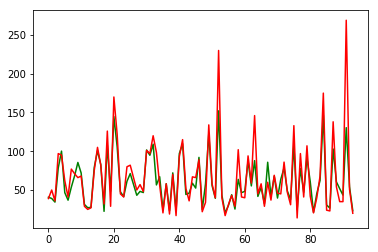

 12%|█▏        | 4/34 [00:33<04:10,  8.35s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:106.878	val-gamma-nloglik:97.1555	train-sMAPE:1.91491	val-sMAPE:1.89855
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.70696	val-gamma-nloglik:4.72087	train-sMAPE:0.01326	val-sMAPE:0.307025
[200]	train-gamma-nloglik:4.70682	val-gamma-nloglik:4.72037	train-sMAPE:0.000632	val-sMAPE:0.304005
Stopping. Best iteration:
[244]	train-gamma-nloglik:4.70682	val-gamma-nloglik:4.72039	train-sMAPE:0.000395	val-sMAPE:0.303995



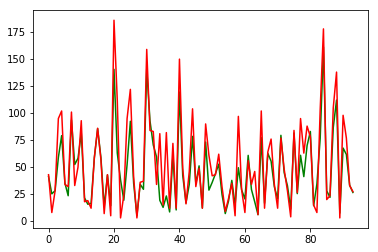

 15%|█▍        | 5/34 [00:43<04:10,  8.65s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:127.161	val-gamma-nloglik:119.613	train-sMAPE:1.94777	val-sMAPE:1.94924
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.99658	val-gamma-nloglik:5.01246	train-sMAPE:0.010792	val-sMAPE:0.153684
[200]	train-gamma-nloglik:4.99649	val-gamma-nloglik:5.0119	train-sMAPE:0.000555	val-sMAPE:0.150813
Stopping. Best iteration:
[207]	train-gamma-nloglik:4.99649	val-gamma-nloglik:5.0119	train-sMAPE:0.000463	val-sMAPE:0.150803



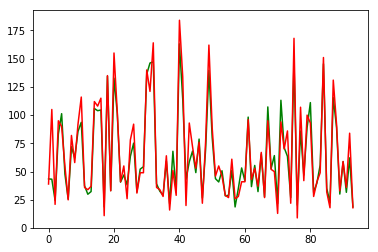

 18%|█▊        | 6/34 [00:51<04:01,  8.64s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:130.322	val-gamma-nloglik:123.927	train-sMAPE:1.95747	val-sMAPE:1.95784
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.10865	val-gamma-nloglik:5.09541	train-sMAPE:0.008459	val-sMAPE:0.121045
[200]	train-gamma-nloglik:5.1086	val-gamma-nloglik:5.095	train-sMAPE:0.000408	val-sMAPE:0.118653
Stopping. Best iteration:
[194]	train-gamma-nloglik:5.1086	val-gamma-nloglik:5.095	train-sMAPE:0.000425	val-sMAPE:0.118652



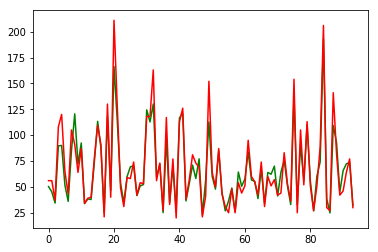

 21%|██        | 7/34 [00:59<03:50,  8.55s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:136.176	val-gamma-nloglik:126.256	train-sMAPE:1.94478	val-sMAPE:1.94408
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.00846	val-gamma-nloglik:4.97656	train-sMAPE:0.01014	val-sMAPE:0.157617
[200]	train-gamma-nloglik:5.00838	val-gamma-nloglik:4.97572	train-sMAPE:0.00041	val-sMAPE:0.154789
Stopping. Best iteration:
[228]	train-gamma-nloglik:5.00838	val-gamma-nloglik:4.97572	train-sMAPE:0.000379	val-sMAPE:0.154779



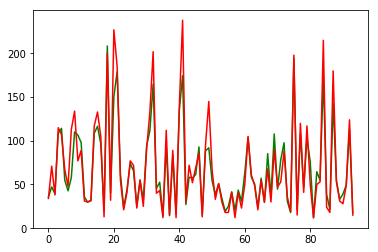

 24%|██▎       | 8/34 [01:08<03:43,  8.60s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:114.714	val-gamma-nloglik:112.946	train-sMAPE:1.95086	val-sMAPE:1.95349
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.9776	val-gamma-nloglik:5.00429	train-sMAPE:0.007785	val-sMAPE:0.14333
[200]	train-gamma-nloglik:4.97755	val-gamma-nloglik:5.00363	train-sMAPE:0.000427	val-sMAPE:0.13946
[300]	train-gamma-nloglik:4.97755	val-gamma-nloglik:5.00363	train-sMAPE:0.000379	val-sMAPE:0.139441
Stopping. Best iteration:
[260]	train-gamma-nloglik:4.97755	val-gamma-nloglik:5.00363	train-sMAPE:0.000379	val-sMAPE:0.139441



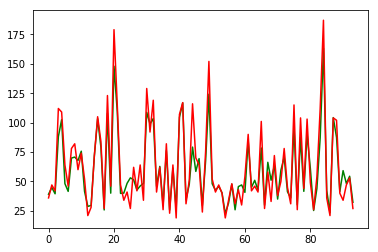

 26%|██▋       | 9/34 [01:18<03:37,  8.71s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:145.39	val-gamma-nloglik:144.668	train-sMAPE:1.95716	val-sMAPE:1.95989
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.19722	val-gamma-nloglik:5.2448	train-sMAPE:0.012316	val-sMAPE:0.216243
[200]	train-gamma-nloglik:5.1971	val-gamma-nloglik:5.24433	train-sMAPE:0.000545	val-sMAPE:0.214259
Stopping. Best iteration:
[211]	train-gamma-nloglik:5.1971	val-gamma-nloglik:5.24432	train-sMAPE:0.000408	val-sMAPE:0.214251



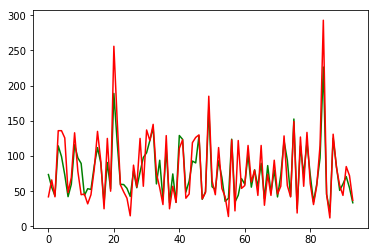

 29%|██▉       | 10/34 [01:26<03:28,  8.69s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:133.367	val-gamma-nloglik:128.533	train-sMAPE:1.95312	val-sMAPE:1.95731
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.08468	val-gamma-nloglik:5.11973	train-sMAPE:0.010438	val-sMAPE:0.142973
[200]	train-gamma-nloglik:5.0846	val-gamma-nloglik:5.1191	train-sMAPE:0.000546	val-sMAPE:0.139803
Stopping. Best iteration:
[220]	train-gamma-nloglik:5.0846	val-gamma-nloglik:5.1191	train-sMAPE:0.00041	val-sMAPE:0.139781



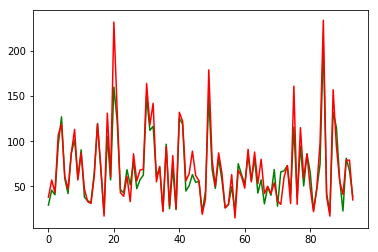

 32%|███▏      | 11/34 [01:35<03:19,  8.69s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:145.105	val-gamma-nloglik:136.886	train-sMAPE:1.95957	val-sMAPE:1.95872
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.19573	val-gamma-nloglik:5.17375	train-sMAPE:0.009047	val-sMAPE:0.145112
[200]	train-gamma-nloglik:5.19567	val-gamma-nloglik:5.17319	train-sMAPE:0.000381	val-sMAPE:0.141966
Stopping. Best iteration:
[191]	train-gamma-nloglik:5.19567	val-gamma-nloglik:5.17319	train-sMAPE:0.00039	val-sMAPE:0.141965



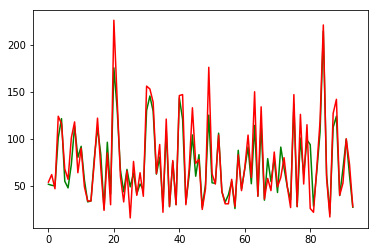

 35%|███▌      | 12/34 [01:43<03:09,  8.62s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:120.348	val-gamma-nloglik:116.607	train-sMAPE:1.94449	val-sMAPE:1.94211
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.94661	val-gamma-nloglik:4.93813	train-sMAPE:0.009541	val-sMAPE:0.17018
[200]	train-gamma-nloglik:4.94654	val-gamma-nloglik:4.93732	train-sMAPE:0.000387	val-sMAPE:0.166133
Stopping. Best iteration:
[197]	train-gamma-nloglik:4.94654	val-gamma-nloglik:4.93732	train-sMAPE:0.000387	val-sMAPE:0.166133



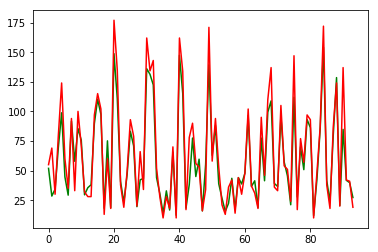

 38%|███▊      | 13/34 [01:51<03:00,  8.59s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:142.838	val-gamma-nloglik:135.934	train-sMAPE:1.96248	val-sMAPE:1.96161
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.228	val-gamma-nloglik:5.20457	train-sMAPE:0.010344	val-sMAPE:0.134485
[200]	train-gamma-nloglik:5.22792	val-gamma-nloglik:5.20402	train-sMAPE:0.000451	val-sMAPE:0.131499
Stopping. Best iteration:
[243]	train-gamma-nloglik:5.22792	val-gamma-nloglik:5.20402	train-sMAPE:0.000399	val-sMAPE:0.131487



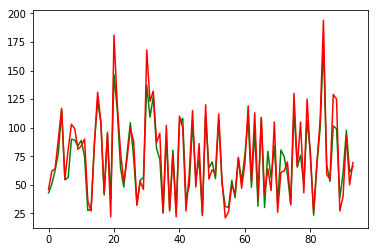

 41%|████      | 14/34 [02:01<02:53,  8.65s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:135.607	val-gamma-nloglik:124.106	train-sMAPE:1.95484	val-sMAPE:1.95445
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.10724	val-gamma-nloglik:5.07348	train-sMAPE:0.00957	val-sMAPE:0.162122
[200]	train-gamma-nloglik:5.10716	val-gamma-nloglik:5.07273	train-sMAPE:0.000456	val-sMAPE:0.159394
Stopping. Best iteration:
[207]	train-gamma-nloglik:5.10716	val-gamma-nloglik:5.07273	train-sMAPE:0.000421	val-sMAPE:0.159384



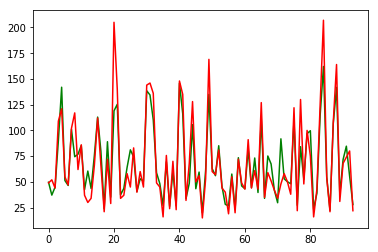

 44%|████▍     | 15/34 [02:09<02:44,  8.65s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:121.135	val-gamma-nloglik:113.622	train-sMAPE:1.94598	val-sMAPE:1.93981
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.966	val-gamma-nloglik:4.9345	train-sMAPE:0.00885	val-sMAPE:0.18694
[200]	train-gamma-nloglik:4.96594	val-gamma-nloglik:4.93354	train-sMAPE:0.000401	val-sMAPE:0.183783
Stopping. Best iteration:
[204]	train-gamma-nloglik:4.96594	val-gamma-nloglik:4.93354	train-sMAPE:0.000385	val-sMAPE:0.183779



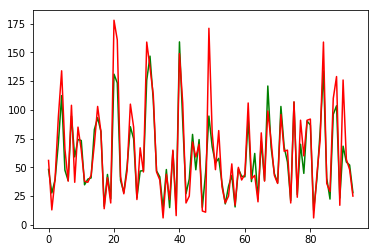

 47%|████▋     | 16/34 [02:18<02:35,  8.64s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:104.69	val-gamma-nloglik:98.4333	train-sMAPE:1.9409	val-sMAPE:1.93646
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.84817	val-gamma-nloglik:4.79961	train-sMAPE:0.009262	val-sMAPE:0.149529
[200]	train-gamma-nloglik:4.84809	val-gamma-nloglik:4.79886	train-sMAPE:0.000485	val-sMAPE:0.146088
Stopping. Best iteration:
[207]	train-gamma-nloglik:4.84809	val-gamma-nloglik:4.79886	train-sMAPE:0.000425	val-sMAPE:0.146073



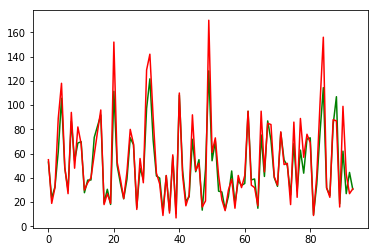

 50%|█████     | 17/34 [02:26<02:26,  8.64s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:108.745	val-gamma-nloglik:106.784	train-sMAPE:1.93828	val-sMAPE:1.94202
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.8339	val-gamma-nloglik:4.86681	train-sMAPE:0.010407	val-sMAPE:0.161833
[200]	train-gamma-nloglik:4.83381	val-gamma-nloglik:4.86559	train-sMAPE:0.000446	val-sMAPE:0.157268
Stopping. Best iteration:
[220]	train-gamma-nloglik:4.83381	val-gamma-nloglik:4.86559	train-sMAPE:0.00039	val-sMAPE:0.157257



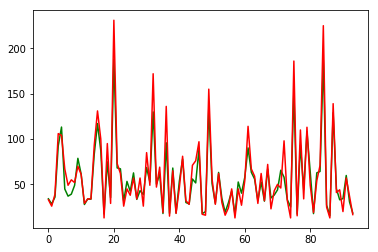

 53%|█████▎    | 18/34 [02:35<02:18,  8.63s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:124.745	val-gamma-nloglik:117.735	train-sMAPE:1.95349	val-sMAPE:1.95391
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.04436	val-gamma-nloglik:5.0306	train-sMAPE:0.008083	val-sMAPE:0.124606
[200]	train-gamma-nloglik:5.04431	val-gamma-nloglik:5.03019	train-sMAPE:0.000387	val-sMAPE:0.122255
Stopping. Best iteration:
[186]	train-gamma-nloglik:5.04431	val-gamma-nloglik:5.03019	train-sMAPE:0.000398	val-sMAPE:0.122252



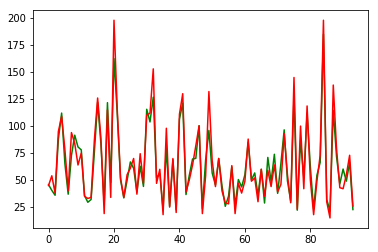

 56%|█████▌    | 19/34 [02:42<02:08,  8.58s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:121.164	val-gamma-nloglik:114.279	train-sMAPE:1.94469	val-sMAPE:1.94813
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.95721	val-gamma-nloglik:4.97309	train-sMAPE:0.010021	val-sMAPE:0.166595
[200]	train-gamma-nloglik:4.95713	val-gamma-nloglik:4.97249	train-sMAPE:0.000447	val-sMAPE:0.164061
Stopping. Best iteration:
[200]	train-gamma-nloglik:4.95713	val-gamma-nloglik:4.97249	train-sMAPE:0.000447	val-sMAPE:0.164061



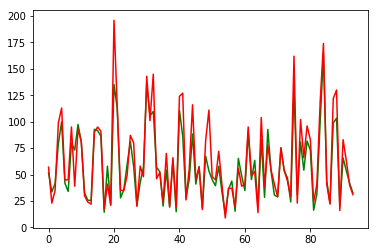

 59%|█████▉    | 20/34 [02:51<01:59,  8.56s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:125.717	val-gamma-nloglik:121.54	train-sMAPE:1.95093	val-sMAPE:1.9537
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.0169	val-gamma-nloglik:5.04601	train-sMAPE:0.00994	val-sMAPE:0.11306
[200]	train-gamma-nloglik:5.01683	val-gamma-nloglik:5.04556	train-sMAPE:0.000496	val-sMAPE:0.11057
Stopping. Best iteration:
[205]	train-gamma-nloglik:5.01683	val-gamma-nloglik:5.04556	train-sMAPE:0.000447	val-sMAPE:0.110564



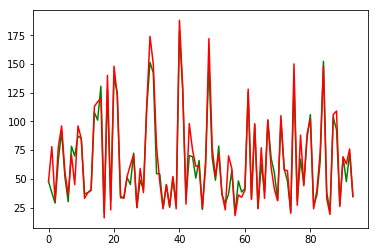

 62%|██████▏   | 21/34 [02:59<01:51,  8.55s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:127.43	val-gamma-nloglik:120.97	train-sMAPE:1.95299	val-sMAPE:1.95387
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.05352	val-gamma-nloglik:5.04753	train-sMAPE:0.010462	val-sMAPE:0.157477
[200]	train-gamma-nloglik:5.05344	val-gamma-nloglik:5.04703	train-sMAPE:0.000527	val-sMAPE:0.15521
Stopping. Best iteration:
[215]	train-gamma-nloglik:5.05344	val-gamma-nloglik:5.04704	train-sMAPE:0.000407	val-sMAPE:0.155204



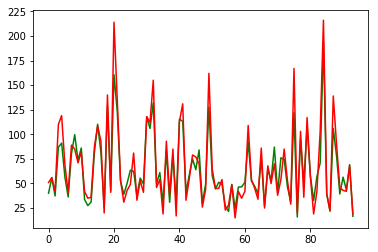

 65%|██████▍   | 22/34 [03:08<01:42,  8.55s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:139.088	val-gamma-nloglik:132.25	train-sMAPE:1.95322	val-sMAPE:1.95178
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.10459	val-gamma-nloglik:5.09485	train-sMAPE:0.009513	val-sMAPE:0.147108
[200]	train-gamma-nloglik:5.10452	val-gamma-nloglik:5.09407	train-sMAPE:0.000394	val-sMAPE:0.143337
Stopping. Best iteration:
[207]	train-gamma-nloglik:5.10452	val-gamma-nloglik:5.09407	train-sMAPE:0.000375	val-sMAPE:0.143334



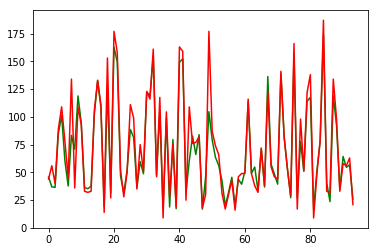

 68%|██████▊   | 23/34 [03:16<01:34,  8.56s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:118.08	val-gamma-nloglik:113.615	train-sMAPE:1.94954	val-sMAPE:1.9491
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.97639	val-gamma-nloglik:4.99222	train-sMAPE:0.011187	val-sMAPE:0.175838
[200]	train-gamma-nloglik:4.9763	val-gamma-nloglik:4.99195	train-sMAPE:0.000612	val-sMAPE:0.174102
Stopping. Best iteration:
[233]	train-gamma-nloglik:4.9763	val-gamma-nloglik:4.99195	train-sMAPE:0.000389	val-sMAPE:0.174092



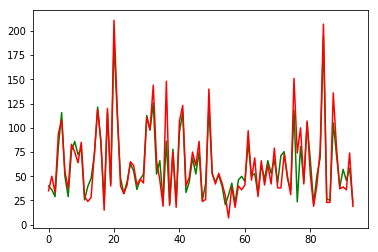

 71%|███████   | 24/34 [03:25<01:25,  8.58s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:130.548	val-gamma-nloglik:125.026	train-sMAPE:1.95652	val-sMAPE:1.95792
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.10277	val-gamma-nloglik:5.11047	train-sMAPE:0.008797	val-sMAPE:0.127111
[200]	train-gamma-nloglik:5.10271	val-gamma-nloglik:5.11018	train-sMAPE:0.000372	val-sMAPE:0.125466
Stopping. Best iteration:
[205]	train-gamma-nloglik:5.10271	val-gamma-nloglik:5.11017	train-sMAPE:0.000359	val-sMAPE:0.12546



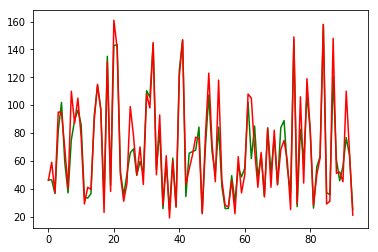

 74%|███████▎  | 25/34 [03:34<01:17,  8.58s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:124.38	val-gamma-nloglik:118.139	train-sMAPE:1.94772	val-sMAPE:1.94811
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.98858	val-gamma-nloglik:4.99166	train-sMAPE:0.010259	val-sMAPE:0.176998
[200]	train-gamma-nloglik:4.9885	val-gamma-nloglik:4.99085	train-sMAPE:0.000504	val-sMAPE:0.174348
Stopping. Best iteration:
[245]	train-gamma-nloglik:4.9885	val-gamma-nloglik:4.99085	train-sMAPE:0.000397	val-sMAPE:0.174323



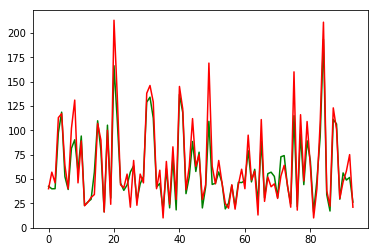

 76%|███████▋  | 26/34 [03:44<01:08,  8.62s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:124.957	val-gamma-nloglik:121.116	train-sMAPE:1.95433	val-sMAPE:1.95643
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.05907	val-gamma-nloglik:5.07436	train-sMAPE:0.012689	val-sMAPE:0.14658
[200]	train-gamma-nloglik:5.05895	val-gamma-nloglik:5.07384	train-sMAPE:0.000727	val-sMAPE:0.144073
Stopping. Best iteration:
[195]	train-gamma-nloglik:5.05895	val-gamma-nloglik:5.07384	train-sMAPE:0.000822	val-sMAPE:0.144065



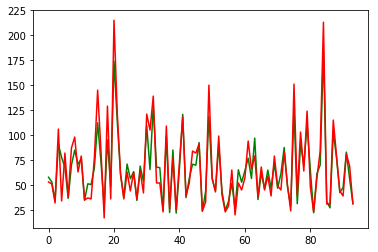

 79%|███████▉  | 27/34 [03:52<01:00,  8.61s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:136.079	val-gamma-nloglik:125.955	train-sMAPE:1.94745	val-sMAPE:1.94203
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.07453	val-gamma-nloglik:5.06149	train-sMAPE:0.01183	val-sMAPE:0.198462
[200]	train-gamma-nloglik:5.07443	val-gamma-nloglik:5.06065	train-sMAPE:0.00053	val-sMAPE:0.194678
Stopping. Best iteration:
[218]	train-gamma-nloglik:5.07443	val-gamma-nloglik:5.06065	train-sMAPE:0.000403	val-sMAPE:0.19465



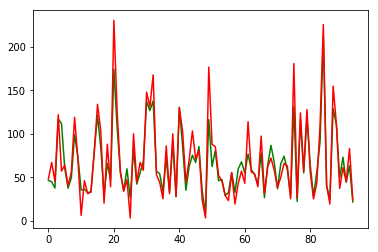

 82%|████████▏ | 28/34 [04:01<00:51,  8.61s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:127.404	val-gamma-nloglik:117.81	train-sMAPE:1.95421	val-sMAPE:1.95414
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.07072	val-gamma-nloglik:5.04143	train-sMAPE:0.009036	val-sMAPE:0.138314
[200]	train-gamma-nloglik:5.07066	val-gamma-nloglik:5.04096	train-sMAPE:0.0004	val-sMAPE:0.137008
Stopping. Best iteration:
[176]	train-gamma-nloglik:5.07066	val-gamma-nloglik:5.04096	train-sMAPE:0.000598	val-sMAPE:0.137003



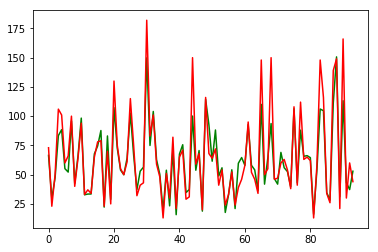

 85%|████████▌ | 29/34 [04:08<00:42,  8.57s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:111.469	val-gamma-nloglik:108.504	train-sMAPE:1.95043	val-sMAPE:1.9511
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.96031	val-gamma-nloglik:4.96514	train-sMAPE:0.00659	val-sMAPE:0.120616
[200]	train-gamma-nloglik:4.96028	val-gamma-nloglik:4.96481	train-sMAPE:0.000355	val-sMAPE:0.11887
Stopping. Best iteration:
[183]	train-gamma-nloglik:4.96028	val-gamma-nloglik:4.96481	train-sMAPE:0.000355	val-sMAPE:0.11887



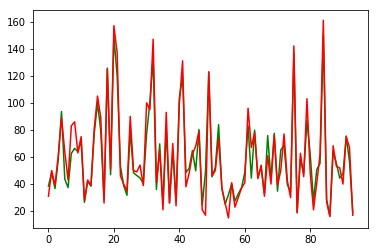

 88%|████████▊ | 30/34 [04:16<00:34,  8.54s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:109.382	val-gamma-nloglik:106.809	train-sMAPE:1.87249	val-sMAPE:1.90121
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.61215	val-gamma-nloglik:4.79775	train-sMAPE:0.010845	val-sMAPE:0.207401
[200]	train-gamma-nloglik:4.61205	val-gamma-nloglik:4.79726	train-sMAPE:0.000508	val-sMAPE:0.204994
Stopping. Best iteration:
[217]	train-gamma-nloglik:4.61205	val-gamma-nloglik:4.79726	train-sMAPE:0.000371	val-sMAPE:0.204975



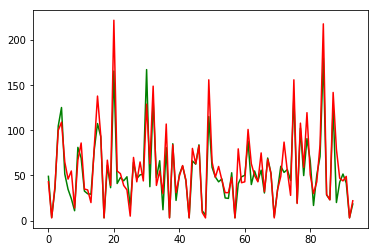

 91%|█████████ | 31/34 [04:24<00:25,  8.54s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:130.818	val-gamma-nloglik:127.267	train-sMAPE:1.9579	val-sMAPE:1.95626
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.13466	val-gamma-nloglik:5.13387	train-sMAPE:0.009156	val-sMAPE:0.146355
[200]	train-gamma-nloglik:5.13459	val-gamma-nloglik:5.13355	train-sMAPE:0.000417	val-sMAPE:0.144539
Stopping. Best iteration:
[200]	train-gamma-nloglik:5.13459	val-gamma-nloglik:5.13355	train-sMAPE:0.000417	val-sMAPE:0.144539



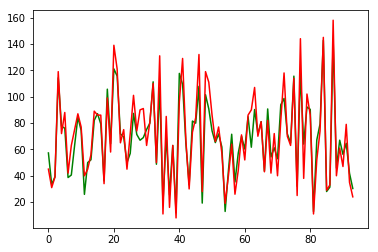

 94%|█████████▍| 32/34 [04:33<00:17,  8.53s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:128.221	val-gamma-nloglik:122.737	train-sMAPE:1.95651	val-sMAPE:1.95552
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.08948	val-gamma-nloglik:5.0951	train-sMAPE:0.009905	val-sMAPE:0.184974
[200]	train-gamma-nloglik:5.0894	val-gamma-nloglik:5.09417	train-sMAPE:0.000405	val-sMAPE:0.182407
Stopping. Best iteration:
[201]	train-gamma-nloglik:5.0894	val-gamma-nloglik:5.09417	train-sMAPE:0.000397	val-sMAPE:0.182404



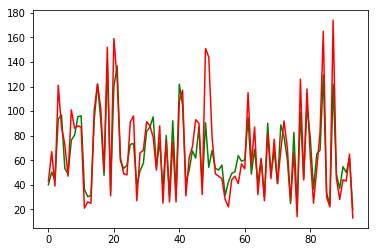

 97%|█████████▋| 33/34 [04:41<00:08,  8.52s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:103.758	val-gamma-nloglik:103.495	train-sMAPE:1.87978	val-sMAPE:1.90837
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.56677	val-gamma-nloglik:4.82866	train-sMAPE:0.015347	val-sMAPE:0.350978
[200]	train-gamma-nloglik:4.56659	val-gamma-nloglik:4.82656	train-sMAPE:0.000907	val-sMAPE:0.347058
[300]	train-gamma-nloglik:4.56659	val-gamma-nloglik:4.82651	train-sMAPE:0.000397	val-sMAPE:0.346974
Stopping. Best iteration:
[256]	train-gamma-nloglik:4.56659	val-gamma-nloglik:4.82651	train-sMAPE:0.000397	val-sMAPE:0.346974



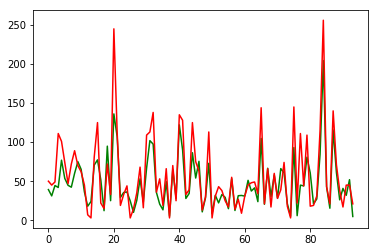

100%|██████████| 34/34 [04:51<00:00,  8.56s/it]


In [181]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:12093],train_data[:,12093+288*i:12093+288*(i+1)],train_data[:,-117:-102]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:12093],val_data[:,12093+288*i:12093+288*(i+1)],val_data[:,-117:-102]),axis = 1)
    trainY = train_data[:, -102+3*i]
    valY = val_data[:, -102+3*i]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)

    params={
#     'tree_method':'hist',
    'booster': 'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':5, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':1, # 随机采样训练样本
    'colsample_bytree':0.1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.1, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
    #     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst ,xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/beijing/'+ str(i) +'_PM2.5.model') # 用于存储训练出的模型

# PM10

  0%|          | 0/34 [00:00<?, ?it/s]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:179.054	val-gamma-nloglik:182.332	train-sMAPE:1.97323	val-sMAPE:1.97292
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.50859	val-gamma-nloglik:5.52914	train-sMAPE:0.011816	val-sMAPE:0.122606
[200]	train-gamma-nloglik:5.50848	val-gamma-nloglik:5.52847	train-sMAPE:0.000532	val-sMAPE:0.117302
Stopping. Best iteration:
[223]	train-gamma-nloglik:5.50848	val-gamma-nloglik:5.52847	train-sMAPE:0.00039	val-sMAPE:0.117269



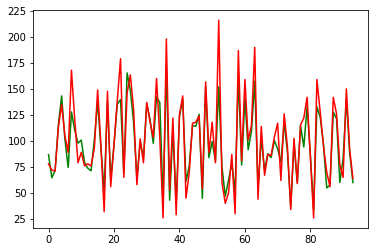

  3%|▎         | 1/34 [00:08<04:49,  8.77s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:223.31	val-gamma-nloglik:226.896	train-sMAPE:1.97249	val-sMAPE:1.97387
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.6614	val-gamma-nloglik:5.79412	train-sMAPE:0.01939	val-sMAPE:0.213886
[200]	train-gamma-nloglik:5.6611	val-gamma-nloglik:5.79361	train-sMAPE:0.000747	val-sMAPE:0.209378
Stopping. Best iteration:
[243]	train-gamma-nloglik:5.6611	val-gamma-nloglik:5.7936	train-sMAPE:0.00038	val-sMAPE:0.209358



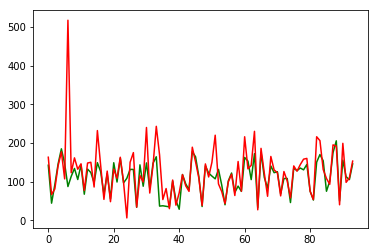

  6%|▌         | 2/34 [00:18<04:49,  9.03s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:222.521	val-gamma-nloglik:219.752	train-sMAPE:1.97286	val-sMAPE:1.96799
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.66301	val-gamma-nloglik:5.64689	train-sMAPE:0.011368	val-sMAPE:0.128515
[200]	train-gamma-nloglik:5.6629	val-gamma-nloglik:5.64653	train-sMAPE:0.000396	val-sMAPE:0.125751
Stopping. Best iteration:
[152]	train-gamma-nloglik:5.6629	val-gamma-nloglik:5.64655	train-sMAPE:0.001161	val-sMAPE:0.125728



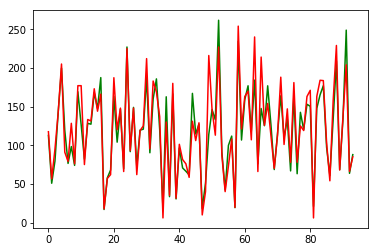

  9%|▉         | 3/34 [00:25<04:21,  8.44s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:227.103	val-gamma-nloglik:219.362	train-sMAPE:1.97923	val-sMAPE:1.97006
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.75705	val-gamma-nloglik:5.74517	train-sMAPE:0.013471	val-sMAPE:0.17429
[200]	train-gamma-nloglik:5.75691	val-gamma-nloglik:5.74483	train-sMAPE:0.000585	val-sMAPE:0.172892
Stopping. Best iteration:
[228]	train-gamma-nloglik:5.75691	val-gamma-nloglik:5.74482	train-sMAPE:0.000387	val-sMAPE:0.172846



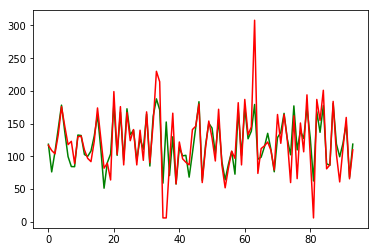

 12%|█▏        | 4/34 [00:35<04:22,  8.75s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:154.252	val-gamma-nloglik:152.823	train-sMAPE:1.96283	val-sMAPE:1.9631
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.28656	val-gamma-nloglik:5.29702	train-sMAPE:0.010156	val-sMAPE:0.152141
[200]	train-gamma-nloglik:5.28648	val-gamma-nloglik:5.29624	train-sMAPE:0.000414	val-sMAPE:0.148622
Stopping. Best iteration:
[194]	train-gamma-nloglik:5.28648	val-gamma-nloglik:5.29624	train-sMAPE:0.000458	val-sMAPE:0.148614



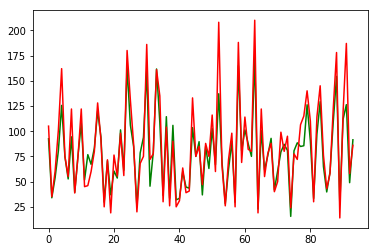

 15%|█▍        | 5/34 [00:43<04:15,  8.80s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:136.044	val-gamma-nloglik:145.763	train-sMAPE:1.96187	val-sMAPE:1.96508
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.18847	val-gamma-nloglik:5.27881	train-sMAPE:0.009003	val-sMAPE:0.117341
[200]	train-gamma-nloglik:5.18841	val-gamma-nloglik:5.278	train-sMAPE:0.000404	val-sMAPE:0.113008
Stopping. Best iteration:
[215]	train-gamma-nloglik:5.18841	val-gamma-nloglik:5.278	train-sMAPE:0.000388	val-sMAPE:0.113001



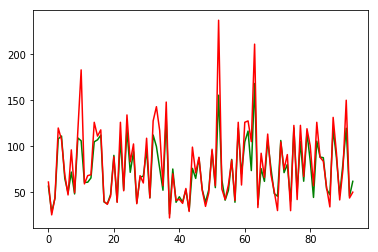

 18%|█▊        | 6/34 [00:53<04:09,  8.92s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:168.74	val-gamma-nloglik:169.8	train-sMAPE:1.9711	val-sMAPE:1.97137
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.45422	val-gamma-nloglik:5.48409	train-sMAPE:0.010392	val-sMAPE:0.137482
[200]	train-gamma-nloglik:5.45414	val-gamma-nloglik:5.48332	train-sMAPE:0.000415	val-sMAPE:0.134471
Stopping. Best iteration:
[200]	train-gamma-nloglik:5.45414	val-gamma-nloglik:5.48332	train-sMAPE:0.000415	val-sMAPE:0.134471



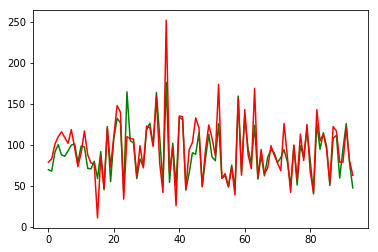

 21%|██        | 7/34 [01:01<03:58,  8.84s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:234.295	val-gamma-nloglik:234.359	train-sMAPE:1.97947	val-sMAPE:1.9791
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.7773	val-gamma-nloglik:5.77824	train-sMAPE:0.01274	val-sMAPE:0.123407
[200]	train-gamma-nloglik:5.77716	val-gamma-nloglik:5.77729	train-sMAPE:0.000428	val-sMAPE:0.119504
Stopping. Best iteration:
[220]	train-gamma-nloglik:5.77716	val-gamma-nloglik:5.77728	train-sMAPE:0.000367	val-sMAPE:0.119487



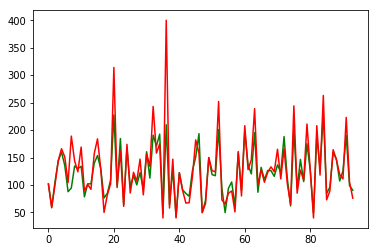

 24%|██▎       | 8/34 [01:11<03:51,  8.89s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:236.094	val-gamma-nloglik:249.554	train-sMAPE:1.97958	val-sMAPE:1.98162
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.78926	val-gamma-nloglik:5.87087	train-sMAPE:0.012265	val-sMAPE:0.107
[200]	train-gamma-nloglik:5.78913	val-gamma-nloglik:5.87017	train-sMAPE:0.000447	val-sMAPE:0.101894
Stopping. Best iteration:
[199]	train-gamma-nloglik:5.78913	val-gamma-nloglik:5.87017	train-sMAPE:0.000453	val-sMAPE:0.101891



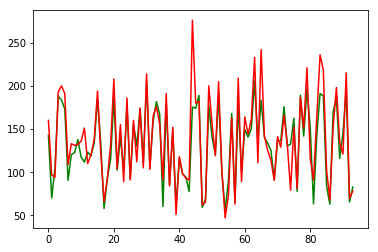

 26%|██▋       | 9/34 [01:19<03:40,  8.80s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:208.76	val-gamma-nloglik:218.112	train-sMAPE:1.97305	val-sMAPE:1.97428
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.62131	val-gamma-nloglik:5.6924	train-sMAPE:0.011226	val-sMAPE:0.138814
[200]	train-gamma-nloglik:5.62121	val-gamma-nloglik:5.69159	train-sMAPE:0.000439	val-sMAPE:0.135346
Stopping. Best iteration:
[204]	train-gamma-nloglik:5.62121	val-gamma-nloglik:5.69159	train-sMAPE:0.000398	val-sMAPE:0.135335



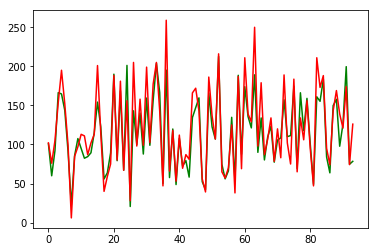

 29%|██▉       | 10/34 [01:27<03:29,  8.75s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:219.23	val-gamma-nloglik:223.103	train-sMAPE:1.97661	val-sMAPE:1.97762
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.68592	val-gamma-nloglik:5.73446	train-sMAPE:0.017048	val-sMAPE:0.124134
[200]	train-gamma-nloglik:5.68569	val-gamma-nloglik:5.734	train-sMAPE:0.000832	val-sMAPE:0.121978
Stopping. Best iteration:
[157]	train-gamma-nloglik:5.6857	val-gamma-nloglik:5.734	train-sMAPE:0.002247	val-sMAPE:0.121944



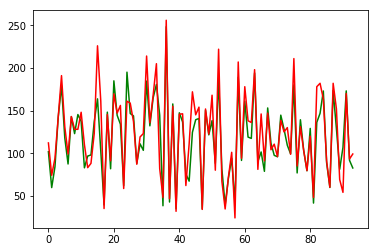

 32%|███▏      | 11/34 [01:34<03:18,  8.62s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:177.13	val-gamma-nloglik:175.037	train-sMAPE:1.97126	val-sMAPE:1.96947
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.48423	val-gamma-nloglik:5.4875	train-sMAPE:0.012331	val-sMAPE:0.131404
[200]	train-gamma-nloglik:5.4841	val-gamma-nloglik:5.48656	train-sMAPE:0.000463	val-sMAPE:0.127566
Stopping. Best iteration:
[209]	train-gamma-nloglik:5.4841	val-gamma-nloglik:5.48656	train-sMAPE:0.000402	val-sMAPE:0.127548



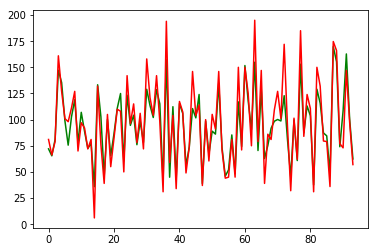

 35%|███▌      | 12/34 [01:43<03:09,  8.62s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:195.382	val-gamma-nloglik:189.982	train-sMAPE:1.96886	val-sMAPE:1.96578
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.51716	val-gamma-nloglik:5.53234	train-sMAPE:0.016834	val-sMAPE:0.230684
[200]	train-gamma-nloglik:5.51692	val-gamma-nloglik:5.53066	train-sMAPE:0.000803	val-sMAPE:0.226313
Stopping. Best iteration:
[248]	train-gamma-nloglik:5.51692	val-gamma-nloglik:5.53064	train-sMAPE:0.000404	val-sMAPE:0.226258



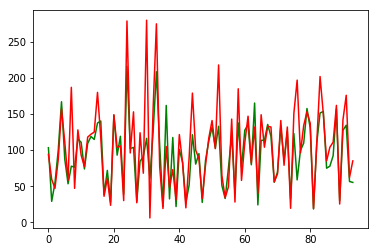

 38%|███▊      | 13/34 [01:53<03:02,  8.70s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:236.081	val-gamma-nloglik:256.145	train-sMAPE:1.97409	val-sMAPE:1.97668
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.7172	val-gamma-nloglik:5.86208	train-sMAPE:0.01343	val-sMAPE:0.184356
[200]	train-gamma-nloglik:5.71707	val-gamma-nloglik:5.86067	train-sMAPE:0.000586	val-sMAPE:0.179464
Stopping. Best iteration:
[204]	train-gamma-nloglik:5.71707	val-gamma-nloglik:5.86067	train-sMAPE:0.000549	val-sMAPE:0.179463



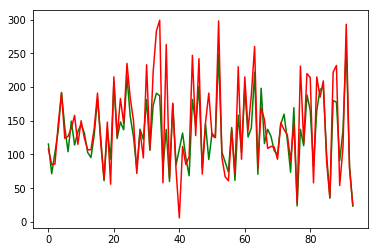

 41%|████      | 14/34 [02:01<02:54,  8.70s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:202.958	val-gamma-nloglik:195.876	train-sMAPE:1.97413	val-sMAPE:1.97498
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.59827	val-gamma-nloglik:5.60034	train-sMAPE:0.014659	val-sMAPE:0.109227
[200]	train-gamma-nloglik:5.59809	val-gamma-nloglik:5.59978	train-sMAPE:0.000637	val-sMAPE:0.105076
Stopping. Best iteration:
[203]	train-gamma-nloglik:5.59809	val-gamma-nloglik:5.59978	train-sMAPE:0.000586	val-sMAPE:0.105062



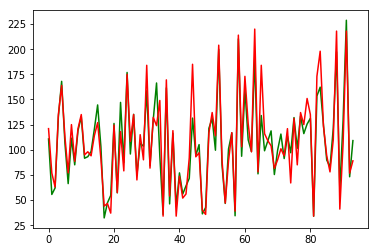

 44%|████▍     | 15/34 [02:10<02:45,  8.70s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:174.094	val-gamma-nloglik:174.082	train-sMAPE:1.96787	val-sMAPE:1.96952
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.43888	val-gamma-nloglik:5.46178	train-sMAPE:0.010206	val-sMAPE:0.136136
[200]	train-gamma-nloglik:5.43879	val-gamma-nloglik:5.46122	train-sMAPE:0.000441	val-sMAPE:0.132157
Stopping. Best iteration:
[204]	train-gamma-nloglik:5.43879	val-gamma-nloglik:5.46122	train-sMAPE:0.000397	val-sMAPE:0.132152



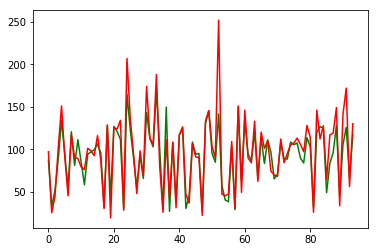

 47%|████▋     | 16/34 [02:20<02:37,  8.76s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:153.181	val-gamma-nloglik:149.7	train-sMAPE:1.96286	val-sMAPE:1.96104
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.29029	val-gamma-nloglik:5.29002	train-sMAPE:0.015911	val-sMAPE:0.148896
[200]	train-gamma-nloglik:5.29008	val-gamma-nloglik:5.28887	train-sMAPE:0.000832	val-sMAPE:0.145314
Stopping. Best iteration:
[246]	train-gamma-nloglik:5.29008	val-gamma-nloglik:5.28886	train-sMAPE:0.000402	val-sMAPE:0.145253



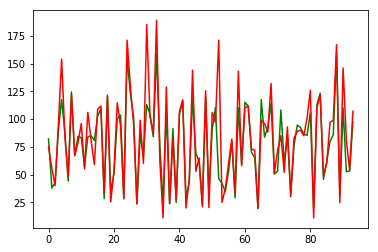

 50%|█████     | 17/34 [02:29<02:29,  8.82s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:240.931	val-gamma-nloglik:248.426	train-sMAPE:1.97966	val-sMAPE:1.98119
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.80089	val-gamma-nloglik:5.86111	train-sMAPE:0.011907	val-sMAPE:0.127782
[200]	train-gamma-nloglik:5.80077	val-gamma-nloglik:5.86059	train-sMAPE:0.000524	val-sMAPE:0.123328
Stopping. Best iteration:
[218]	train-gamma-nloglik:5.80077	val-gamma-nloglik:5.86059	train-sMAPE:0.000389	val-sMAPE:0.123305



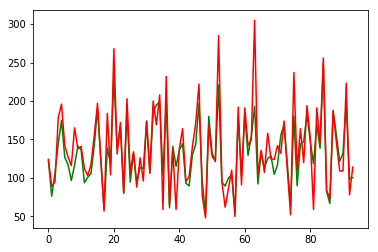

 53%|█████▎    | 18/34 [02:38<02:21,  8.82s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:192.548	val-gamma-nloglik:193.954	train-sMAPE:1.97204	val-sMAPE:1.9748
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.55205	val-gamma-nloglik:5.60325	train-sMAPE:0.012825	val-sMAPE:0.137064
[200]	train-gamma-nloglik:5.55192	val-gamma-nloglik:5.60288	train-sMAPE:0.000456	val-sMAPE:0.133255
Stopping. Best iteration:
[204]	train-gamma-nloglik:5.55192	val-gamma-nloglik:5.60288	train-sMAPE:0.000407	val-sMAPE:0.133248



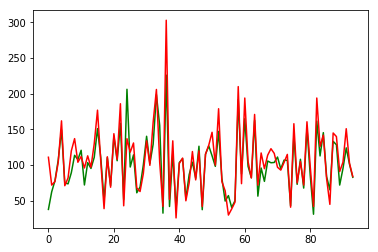

 56%|█████▌    | 19/34 [02:46<02:11,  8.79s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:202.384	val-gamma-nloglik:200.328	train-sMAPE:1.972	val-sMAPE:1.97332
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.57382	val-gamma-nloglik:5.60001	train-sMAPE:0.011675	val-sMAPE:0.147881
[200]	train-gamma-nloglik:5.57371	val-gamma-nloglik:5.59931	train-sMAPE:0.000613	val-sMAPE:0.144578
[300]	train-gamma-nloglik:5.57371	val-gamma-nloglik:5.59931	train-sMAPE:0.000396	val-sMAPE:0.144554
Stopping. Best iteration:
[254]	train-gamma-nloglik:5.57371	val-gamma-nloglik:5.59931	train-sMAPE:0.000396	val-sMAPE:0.144554



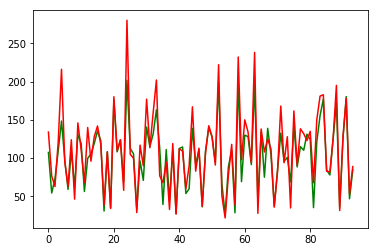

 59%|█████▉    | 20/34 [02:56<02:03,  8.83s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:135.884	val-gamma-nloglik:135.955	train-sMAPE:1.9601	val-sMAPE:1.96018
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.16838	val-gamma-nloglik:5.18602	train-sMAPE:0.010138	val-sMAPE:0.126988
[200]	train-gamma-nloglik:5.1683	val-gamma-nloglik:5.18533	train-sMAPE:0.000489	val-sMAPE:0.124007
Stopping. Best iteration:
[217]	train-gamma-nloglik:5.1683	val-gamma-nloglik:5.18533	train-sMAPE:0.000389	val-sMAPE:0.123997



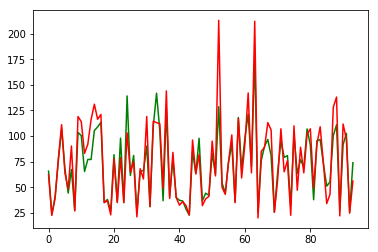

 62%|██████▏   | 21/34 [03:05<01:54,  8.82s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:199.346	val-gamma-nloglik:206.443	train-sMAPE:1.97534	val-sMAPE:1.9775
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.61116	val-gamma-nloglik:5.67873	train-sMAPE:0.012154	val-sMAPE:0.11393
[200]	train-gamma-nloglik:5.61104	val-gamma-nloglik:5.6782	train-sMAPE:0.000512	val-sMAPE:0.109871
Stopping. Best iteration:
[222]	train-gamma-nloglik:5.61104	val-gamma-nloglik:5.67819	train-sMAPE:0.000397	val-sMAPE:0.109847



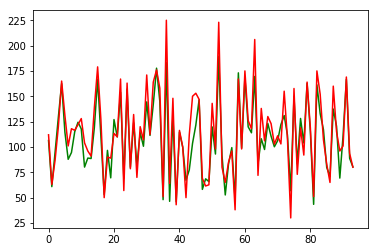

 65%|██████▍   | 22/34 [03:13<01:45,  8.81s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:193.419	val-gamma-nloglik:190.183	train-sMAPE:1.97327	val-sMAPE:1.96861
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.56631	val-gamma-nloglik:5.54141	train-sMAPE:0.010668	val-sMAPE:0.121815
[200]	train-gamma-nloglik:5.56622	val-gamma-nloglik:5.54115	train-sMAPE:0.000438	val-sMAPE:0.118478
Stopping. Best iteration:
[207]	train-gamma-nloglik:5.56622	val-gamma-nloglik:5.54115	train-sMAPE:0.000393	val-sMAPE:0.118468



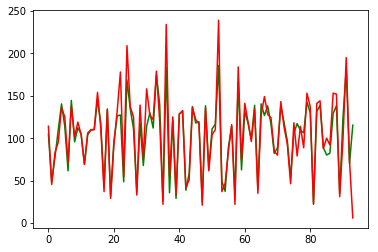

 68%|██████▊   | 23/34 [03:22<01:36,  8.79s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:179.503	val-gamma-nloglik:182.961	train-sMAPE:1.97091	val-sMAPE:1.97283
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.47383	val-gamma-nloglik:5.53002	train-sMAPE:0.010384	val-sMAPE:0.134107
[200]	train-gamma-nloglik:5.47375	val-gamma-nloglik:5.52955	train-sMAPE:0.000398	val-sMAPE:0.132083
Stopping. Best iteration:
[159]	train-gamma-nloglik:5.47375	val-gamma-nloglik:5.52955	train-sMAPE:0.001106	val-sMAPE:0.132075



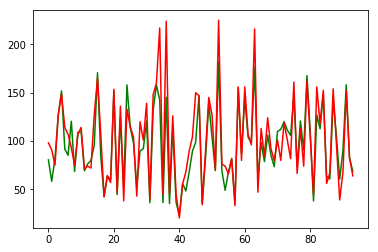

 71%|███████   | 24/34 [03:29<01:27,  8.74s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:220.172	val-gamma-nloglik:213.89	train-sMAPE:1.97636	val-sMAPE:1.96817
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.7	val-gamma-nloglik:5.68989	train-sMAPE:0.014007	val-sMAPE:0.175051
[200]	train-gamma-nloglik:5.69985	val-gamma-nloglik:5.68921	train-sMAPE:0.000667	val-sMAPE:0.172363
Stopping. Best iteration:
[204]	train-gamma-nloglik:5.69985	val-gamma-nloglik:5.68921	train-sMAPE:0.000617	val-sMAPE:0.172351



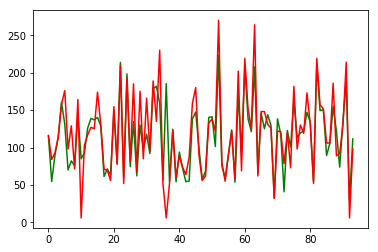

 74%|███████▎  | 25/34 [03:38<01:18,  8.74s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:190.679	val-gamma-nloglik:181.75	train-sMAPE:1.97198	val-sMAPE:1.96611
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.53736	val-gamma-nloglik:5.51124	train-sMAPE:0.014497	val-sMAPE:0.185597
Stopping. Best iteration:
[143]	train-gamma-nloglik:5.53721	val-gamma-nloglik:5.51037	train-sMAPE:0.002649	val-sMAPE:0.18294



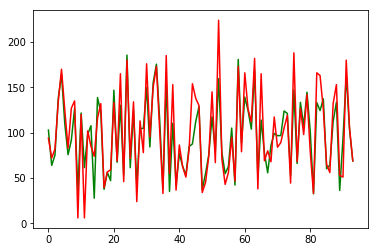

 76%|███████▋  | 26/34 [03:45<01:09,  8.66s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:231.739	val-gamma-nloglik:232.568	train-sMAPE:1.97689	val-sMAPE:1.97513
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.73487	val-gamma-nloglik:5.78912	train-sMAPE:0.017873	val-sMAPE:0.216956
[200]	train-gamma-nloglik:5.73461	val-gamma-nloglik:5.78846	train-sMAPE:0.000818	val-sMAPE:0.212591
Stopping. Best iteration:
[237]	train-gamma-nloglik:5.73461	val-gamma-nloglik:5.78846	train-sMAPE:0.000399	val-sMAPE:0.212573



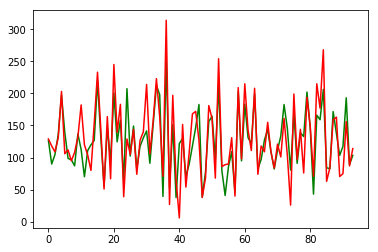

 79%|███████▉  | 27/34 [03:54<01:00,  8.69s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:202.812	val-gamma-nloglik:206.724	train-sMAPE:1.97612	val-sMAPE:1.975
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.62913	val-gamma-nloglik:5.64944	train-sMAPE:0.01271	val-sMAPE:0.12092
[200]	train-gamma-nloglik:5.62901	val-gamma-nloglik:5.6488	train-sMAPE:0.000411	val-sMAPE:0.117023
Stopping. Best iteration:
[204]	train-gamma-nloglik:5.62901	val-gamma-nloglik:5.6488	train-sMAPE:0.000385	val-sMAPE:0.117016



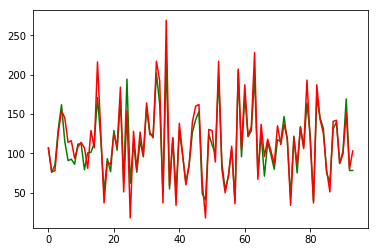

 82%|████████▏ | 28/34 [04:02<00:52,  8.67s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:193.644	val-gamma-nloglik:189.334	train-sMAPE:1.97037	val-sMAPE:1.97041
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.53805	val-gamma-nloglik:5.52441	train-sMAPE:0.01265	val-sMAPE:0.135679
[200]	train-gamma-nloglik:5.53793	val-gamma-nloglik:5.52343	train-sMAPE:0.000431	val-sMAPE:0.130864
Stopping. Best iteration:
[221]	train-gamma-nloglik:5.53793	val-gamma-nloglik:5.52343	train-sMAPE:0.000386	val-sMAPE:0.130858



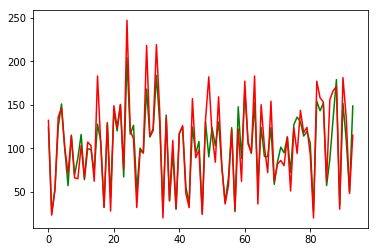

 85%|████████▌ | 29/34 [04:11<00:43,  8.67s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:136.926	val-gamma-nloglik:147.692	train-sMAPE:1.96186	val-sMAPE:1.96758
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.21903	val-gamma-nloglik:5.32271	train-sMAPE:0.009441	val-sMAPE:0.109304
[200]	train-gamma-nloglik:5.21897	val-gamma-nloglik:5.32237	train-sMAPE:0.000407	val-sMAPE:0.107202
Stopping. Best iteration:
[193]	train-gamma-nloglik:5.21897	val-gamma-nloglik:5.32237	train-sMAPE:0.000497	val-sMAPE:0.107189



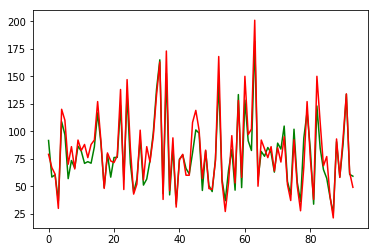

 88%|████████▊ | 30/34 [04:19<00:34,  8.65s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:190.32	val-gamma-nloglik:194.232	train-sMAPE:1.97251	val-sMAPE:1.97224
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.55056	val-gamma-nloglik:5.61255	train-sMAPE:0.015599	val-sMAPE:0.175483
[200]	train-gamma-nloglik:5.55037	val-gamma-nloglik:5.61197	train-sMAPE:0.000649	val-sMAPE:0.173074
Stopping. Best iteration:
[210]	train-gamma-nloglik:5.55037	val-gamma-nloglik:5.61197	train-sMAPE:0.000496	val-sMAPE:0.173065



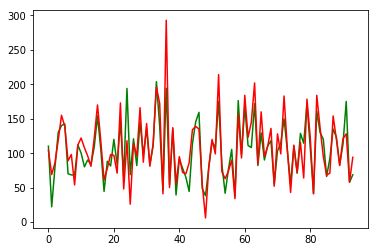

 91%|█████████ | 31/34 [04:28<00:25,  8.65s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:183.246	val-gamma-nloglik:190.12	train-sMAPE:1.97391	val-sMAPE:1.9751
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.5359	val-gamma-nloglik:5.59616	train-sMAPE:0.011304	val-sMAPE:0.121926
[200]	train-gamma-nloglik:5.5358	val-gamma-nloglik:5.5958	train-sMAPE:0.000434	val-sMAPE:0.118281
Stopping. Best iteration:
[205]	train-gamma-nloglik:5.5358	val-gamma-nloglik:5.5958	train-sMAPE:0.000386	val-sMAPE:0.118272



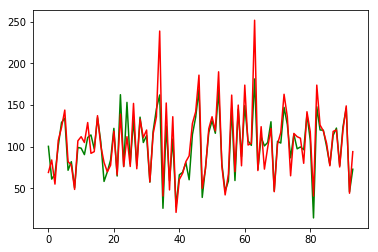

 94%|█████████▍| 32/34 [04:36<00:17,  8.65s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:192.131	val-gamma-nloglik:193.782	train-sMAPE:1.97467	val-sMAPE:1.97591
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.5871	val-gamma-nloglik:5.62225	train-sMAPE:0.015633	val-sMAPE:0.148056
[200]	train-gamma-nloglik:5.58692	val-gamma-nloglik:5.62149	train-sMAPE:0.000578	val-sMAPE:0.144098
Stopping. Best iteration:
[221]	train-gamma-nloglik:5.58692	val-gamma-nloglik:5.62148	train-sMAPE:0.000401	val-sMAPE:0.144063



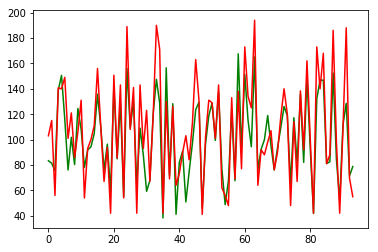

 97%|█████████▋| 33/34 [04:45<00:08,  8.66s/it]

(218, 12330)
(94, 12330)
[0]	train-gamma-nloglik:156.733	val-gamma-nloglik:158.201	train-sMAPE:1.96874	val-sMAPE:1.96882
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.36638	val-gamma-nloglik:5.38774	train-sMAPE:0.010253	val-sMAPE:0.121217
[200]	train-gamma-nloglik:5.3663	val-gamma-nloglik:5.38712	train-sMAPE:0.00043	val-sMAPE:0.116924
Stopping. Best iteration:
[201]	train-gamma-nloglik:5.3663	val-gamma-nloglik:5.38711	train-sMAPE:0.000419	val-sMAPE:0.11692



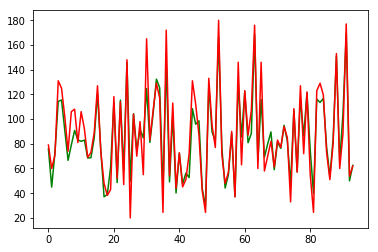

100%|██████████| 34/34 [04:54<00:00,  8.66s/it]


In [182]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:12093],train_data[:,12093+288*i:12093+288*(i+1)],train_data[:,-117:-102]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:12093],val_data[:,12093+288*i:12093+288*(i+1)],val_data[:,-117:-102]),axis = 1)
    trainY = train_data[:, -102+3*i+1]
    valY = val_data[:, -102+3*i+1]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)

    params={
#     'tree_method':'hist',
    'booster': 'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':5, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':1, # 随机采样训练样本
    'colsample_bytree':0.1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.1, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
    #     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/beijing/'+ str(i) +'_PM10.model') # 用于存储训练出的模型

# O3 小维度

  0%|          | 0/34 [00:00<?, ?it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:170.321	val-gamma-nloglik:167.006	train-sMAPE:1.88438	val-sMAPE:1.86915
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.2208	val-gamma-nloglik:5.32675	train-sMAPE:0.435775	val-sMAPE:0.490521
Stopping. Best iteration:
[111]	train-gamma-nloglik:5.21144	val-gamma-nloglik:5.32383	train-sMAPE:0.424163	val-sMAPE:0.487148



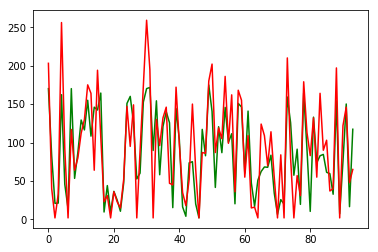

  3%|▎         | 1/34 [00:00<00:16,  1.97it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:166.241	val-gamma-nloglik:151.829	train-sMAPE:1.90524	val-sMAPE:1.90066
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.22723	val-gamma-nloglik:5.30782	train-sMAPE:0.398925	val-sMAPE:0.542927
Stopping. Best iteration:
[120]	train-gamma-nloglik:5.21396	val-gamma-nloglik:5.31701	train-sMAPE:0.372701	val-sMAPE:0.537634



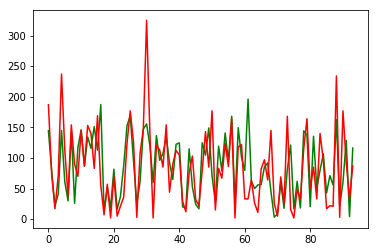

  6%|▌         | 2/34 [00:00<00:14,  2.24it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:176.665	val-gamma-nloglik:166.152	train-sMAPE:1.89247	val-sMAPE:1.88705
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.27372	val-gamma-nloglik:6.05093	train-sMAPE:0.466503	val-sMAPE:0.626801
Stopping. Best iteration:
[86]	train-gamma-nloglik:5.29108	val-gamma-nloglik:5.99299	train-sMAPE:0.487059	val-sMAPE:0.623341



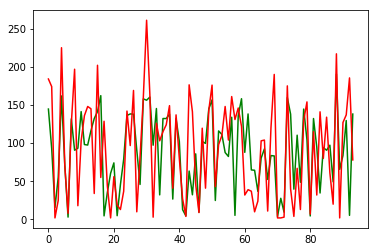

  9%|▉         | 3/34 [00:01<00:12,  2.46it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:161.102	val-gamma-nloglik:164.295	train-sMAPE:1.87648	val-sMAPE:1.9073
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.14831	val-gamma-nloglik:5.36122	train-sMAPE:0.402476	val-sMAPE:0.474705
Stopping. Best iteration:
[136]	train-gamma-nloglik:5.12598	val-gamma-nloglik:5.38715	train-sMAPE:0.373225	val-sMAPE:0.4654



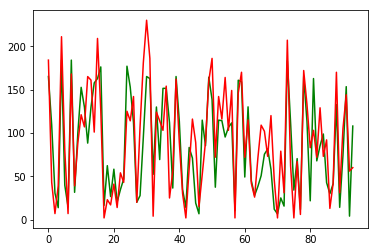

 12%|█▏        | 4/34 [00:01<00:12,  2.50it/s]

(218, 4)
(94, 4)
19.0
[0]	train-gamma-nloglik:186.122	val-gamma-nloglik:180.327	train-sMAPE:1.96782	val-sMAPE:1.96973
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.5109	val-gamma-nloglik:5.53606	train-sMAPE:0.295575	val-sMAPE:0.337884
Stopping. Best iteration:
[78]	train-gamma-nloglik:5.52381	val-gamma-nloglik:5.53901	train-sMAPE:0.324536	val-sMAPE:0.335833



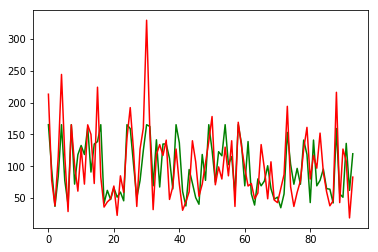

 15%|█▍        | 5/34 [00:01<00:10,  2.65it/s]

(218, 4)
(94, 4)
9.0
[0]	train-gamma-nloglik:190.725	val-gamma-nloglik:191.419	train-sMAPE:1.96036	val-sMAPE:1.96561
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.5546	val-gamma-nloglik:5.61546	train-sMAPE:0.333208	val-sMAPE:0.410293
Stopping. Best iteration:
[117]	train-gamma-nloglik:5.54689	val-gamma-nloglik:5.61468	train-sMAPE:0.317006	val-sMAPE:0.404421



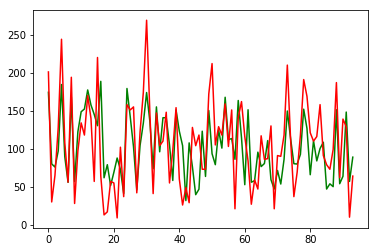

 18%|█▊        | 6/34 [00:02<00:10,  2.70it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:181.179	val-gamma-nloglik:175.976	train-sMAPE:1.93776	val-sMAPE:1.9254
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.38493	val-gamma-nloglik:5.4801	train-sMAPE:0.326623	val-sMAPE:0.445521
Stopping. Best iteration:
[99]	train-gamma-nloglik:5.38583	val-gamma-nloglik:5.4799	train-sMAPE:0.328385	val-sMAPE:0.444848



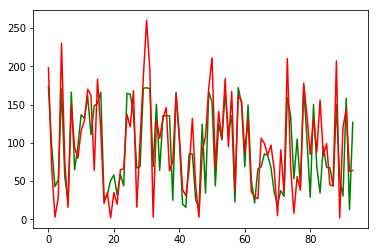

 21%|██        | 7/34 [00:02<00:10,  2.63it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:114.736	val-gamma-nloglik:122.565	train-sMAPE:1.77732	val-sMAPE:1.79578
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.56524	val-gamma-nloglik:4.97827	train-sMAPE:0.516823	val-sMAPE:0.61376
Stopping. Best iteration:
[135]	train-gamma-nloglik:4.53556	val-gamma-nloglik:5.00402	train-sMAPE:0.477481	val-sMAPE:0.612177



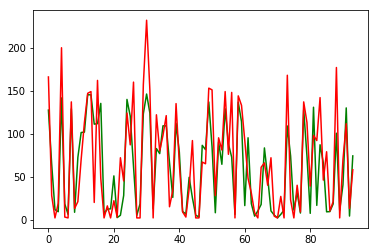

 24%|██▎       | 8/34 [00:03<00:09,  2.64it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:189.766	val-gamma-nloglik:186.788	train-sMAPE:1.92451	val-sMAPE:1.92988
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.36329	val-gamma-nloglik:5.50747	train-sMAPE:0.335223	val-sMAPE:0.413693
[200]	train-gamma-nloglik:5.31945	val-gamma-nloglik:5.5241	train-sMAPE:0.25732	val-sMAPE:0.400258
Stopping. Best iteration:
[176]	train-gamma-nloglik:5.3269	val-gamma-nloglik:5.51616	train-sMAPE:0.268756	val-sMAPE:0.398853



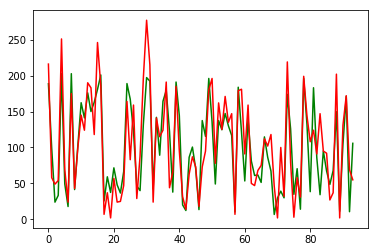

 26%|██▋       | 9/34 [00:03<00:09,  2.60it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:175.642	val-gamma-nloglik:169.758	train-sMAPE:1.9161	val-sMAPE:1.91635
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.31085	val-gamma-nloglik:5.41504	train-sMAPE:0.361626	val-sMAPE:0.453515
[200]	train-gamma-nloglik:5.25136	val-gamma-nloglik:5.69929	train-sMAPE:0.271669	val-sMAPE:0.453618
Stopping. Best iteration:
[157]	train-gamma-nloglik:5.26765	val-gamma-nloglik:5.62528	train-sMAPE:0.299127	val-sMAPE:0.439423



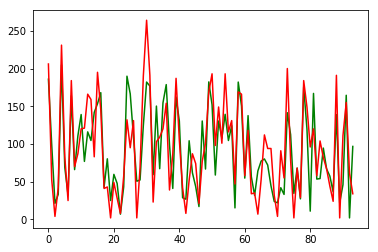

 29%|██▉       | 10/34 [00:03<00:09,  2.59it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:187.178	val-gamma-nloglik:179.842	train-sMAPE:1.93751	val-sMAPE:1.91847
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.40616	val-gamma-nloglik:5.46014	train-sMAPE:0.335355	val-sMAPE:0.447281
Stopping. Best iteration:
[123]	train-gamma-nloglik:5.39435	val-gamma-nloglik:5.46354	train-sMAPE:0.309997	val-sMAPE:0.440687



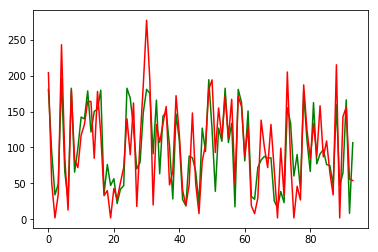

 32%|███▏      | 11/34 [00:04<00:08,  2.61it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:153.955	val-gamma-nloglik:154.436	train-sMAPE:1.89537	val-sMAPE:1.89313
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.13656	val-gamma-nloglik:5.20097	train-sMAPE:0.451878	val-sMAPE:0.459603
Stopping. Best iteration:
[130]	train-gamma-nloglik:5.11505	val-gamma-nloglik:5.19447	train-sMAPE:0.423647	val-sMAPE:0.446603



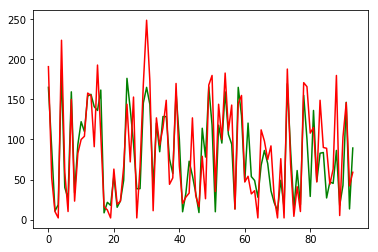

 35%|███▌      | 12/34 [00:04<00:08,  2.61it/s]

(218, 4)
(94, 4)
22.0
[0]	train-gamma-nloglik:180.535	val-gamma-nloglik:174.041	train-sMAPE:1.96895	val-sMAPE:1.96823
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.48367	val-gamma-nloglik:5.47457	train-sMAPE:0.24546	val-sMAPE:0.284541
[200]	train-gamma-nloglik:5.46891	val-gamma-nloglik:5.46912	train-sMAPE:0.191432	val-sMAPE:0.276
[300]	train-gamma-nloglik:5.46215	val-gamma-nloglik:5.4687	train-sMAPE:0.163253	val-sMAPE:0.273234
[400]	train-gamma-nloglik:5.45642	val-gamma-nloglik:5.46592	train-sMAPE:0.137819	val-sMAPE:0.265566
Stopping. Best iteration:
[415]	train-gamma-nloglik:5.45571	val-gamma-nloglik:5.4658	train-sMAPE:0.134277	val-sMAPE:0.264845



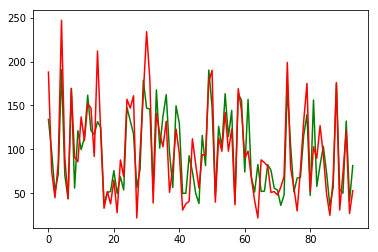

 38%|███▊      | 13/34 [00:05<00:08,  2.41it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:179.041	val-gamma-nloglik:170.18	train-sMAPE:1.94308	val-sMAPE:1.93341
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.34483	val-gamma-nloglik:5.36076	train-sMAPE:0.325193	val-sMAPE:0.435364
[200]	train-gamma-nloglik:5.31329	val-gamma-nloglik:5.36556	train-sMAPE:0.254445	val-sMAPE:0.421345
Stopping. Best iteration:
[188]	train-gamma-nloglik:5.31754	val-gamma-nloglik:5.36107	train-sMAPE:0.263785	val-sMAPE:0.417034



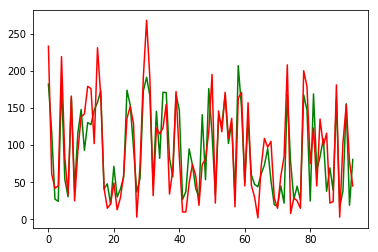

 41%|████      | 14/34 [00:05<00:08,  2.39it/s]

(218, 4)
(94, 4)
17.0
[0]	train-gamma-nloglik:185.172	val-gamma-nloglik:179.75	train-sMAPE:1.96413	val-sMAPE:1.96572
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.46495	val-gamma-nloglik:5.49003	train-sMAPE:0.289128	val-sMAPE:0.32287
Stopping. Best iteration:
[119]	train-gamma-nloglik:5.45801	val-gamma-nloglik:5.49202	train-sMAPE:0.271821	val-sMAPE:0.321387



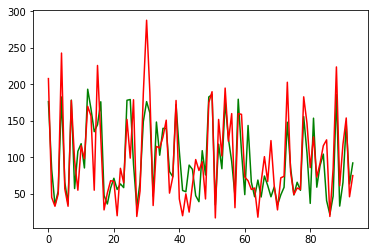

 44%|████▍     | 15/34 [00:06<00:07,  2.42it/s]

(218, 4)
(94, 4)
12.0
[0]	train-gamma-nloglik:208.257	val-gamma-nloglik:199.732	train-sMAPE:1.96369	val-sMAPE:1.96629
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.59844	val-gamma-nloglik:5.59122	train-sMAPE:0.31088	val-sMAPE:0.373435
Stopping. Best iteration:
[85]	train-gamma-nloglik:5.60463	val-gamma-nloglik:5.59199	train-sMAPE:0.322698	val-sMAPE:0.369725



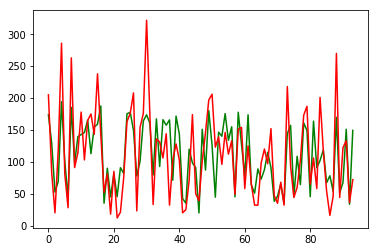

 47%|████▋     | 16/34 [00:06<00:07,  2.46it/s]

(218, 4)
(94, 4)
38.0
[0]	train-gamma-nloglik:236.299	val-gamma-nloglik:234.966	train-sMAPE:1.97889	val-sMAPE:1.97916
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.79668	val-gamma-nloglik:5.8177	train-sMAPE:0.212802	val-sMAPE:0.248379
[200]	train-gamma-nloglik:5.78412	val-gamma-nloglik:5.81486	train-sMAPE:0.161181	val-sMAPE:0.242989
Stopping. Best iteration:
[174]	train-gamma-nloglik:5.78627	val-gamma-nloglik:5.81497	train-sMAPE:0.170461	val-sMAPE:0.242653



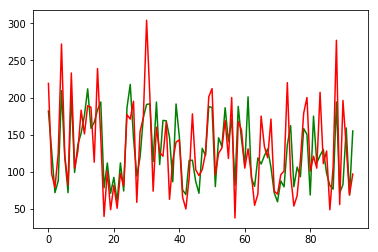

 50%|█████     | 17/34 [00:06<00:06,  2.45it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:106.031	val-gamma-nloglik:99.6843	train-sMAPE:1.84722	val-sMAPE:1.86678
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.6918	val-gamma-nloglik:4.72603	train-sMAPE:0.394249	val-sMAPE:0.460206
Stopping. Best iteration:
[102]	train-gamma-nloglik:4.69098	val-gamma-nloglik:4.7256	train-sMAPE:0.392583	val-sMAPE:0.459834



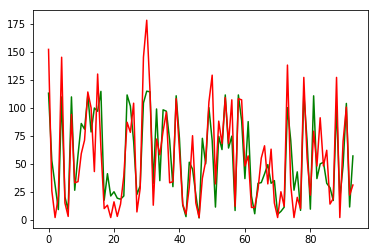

 53%|█████▎    | 18/34 [00:07<00:06,  2.45it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:152.452	val-gamma-nloglik:155.978	train-sMAPE:1.8755	val-sMAPE:1.88801
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.11204	val-gamma-nloglik:5.26755	train-sMAPE:0.428649	val-sMAPE:0.466906
Stopping. Best iteration:
[108]	train-gamma-nloglik:5.1048	val-gamma-nloglik:5.26523	train-sMAPE:0.420774	val-sMAPE:0.464606



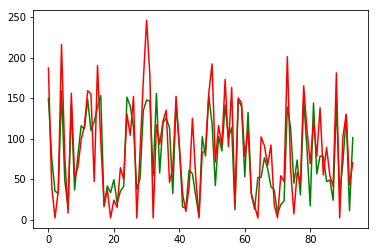

 56%|█████▌    | 19/34 [00:07<00:06,  2.47it/s]

(218, 4)
(94, 4)
5.0
[0]	train-gamma-nloglik:187.164	val-gamma-nloglik:181.059	train-sMAPE:1.95717	val-sMAPE:1.96084
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.45943	val-gamma-nloglik:5.48852	train-sMAPE:0.284986	val-sMAPE:0.344104
[200]	train-gamma-nloglik:5.4327	val-gamma-nloglik:5.48808	train-sMAPE:0.223131	val-sMAPE:0.334924
Stopping. Best iteration:
[164]	train-gamma-nloglik:5.4399	val-gamma-nloglik:5.48716	train-sMAPE:0.242012	val-sMAPE:0.331691



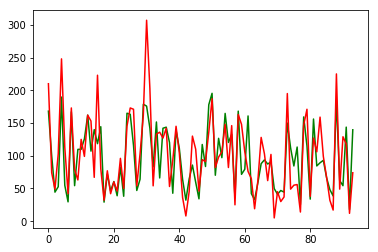

 59%|█████▉    | 20/34 [00:08<00:05,  2.43it/s]

(218, 4)
(94, 4)
5.0
[0]	train-gamma-nloglik:216.658	val-gamma-nloglik:217.795	train-sMAPE:1.9666	val-sMAPE:1.96969
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.66843	val-gamma-nloglik:5.73204	train-sMAPE:0.315397	val-sMAPE:0.351111
Stopping. Best iteration:
[139]	train-gamma-nloglik:5.65719	val-gamma-nloglik:5.73047	train-sMAPE:0.286408	val-sMAPE:0.343911



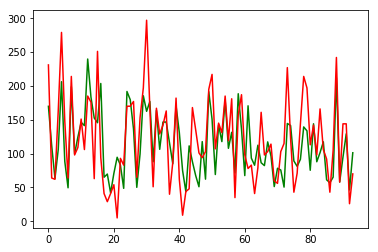

 62%|██████▏   | 21/34 [00:08<00:05,  2.44it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:149.526	val-gamma-nloglik:144.114	train-sMAPE:1.90351	val-sMAPE:1.90075
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.1018	val-gamma-nloglik:5.12996	train-sMAPE:0.353581	val-sMAPE:0.416484
[200]	train-gamma-nloglik:5.04746	val-gamma-nloglik:5.14438	train-sMAPE:0.275007	val-sMAPE:0.413969
Stopping. Best iteration:
[168]	train-gamma-nloglik:5.05943	val-gamma-nloglik:5.13408	train-sMAPE:0.293728	val-sMAPE:0.412862



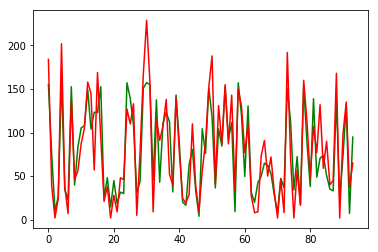

 65%|██████▍   | 22/34 [00:09<00:04,  2.43it/s]

(218, 4)
(94, 4)
4.0
[0]	train-gamma-nloglik:186.94	val-gamma-nloglik:182.831	train-sMAPE:1.94797	val-sMAPE:1.95748
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.41708	val-gamma-nloglik:5.44966	train-sMAPE:0.303517	val-sMAPE:0.33908
Stopping. Best iteration:
[109]	train-gamma-nloglik:5.41308	val-gamma-nloglik:5.44822	train-sMAPE:0.292474	val-sMAPE:0.334754



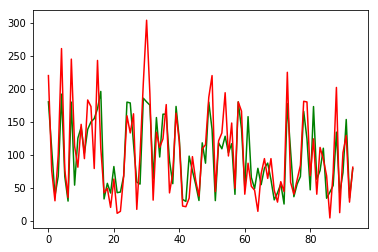

 68%|██████▊   | 23/34 [00:09<00:04,  2.45it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:141.494	val-gamma-nloglik:139.341	train-sMAPE:1.90468	val-sMAPE:1.90426
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.04198	val-gamma-nloglik:5.13979	train-sMAPE:0.34624	val-sMAPE:0.446328
Stopping. Best iteration:
[102]	train-gamma-nloglik:5.04106	val-gamma-nloglik:5.13938	train-sMAPE:0.343922	val-sMAPE:0.445626



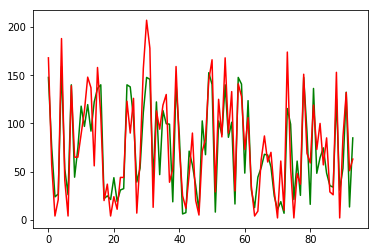

 71%|███████   | 24/34 [00:09<00:04,  2.47it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:158.342	val-gamma-nloglik:159.779	train-sMAPE:1.91895	val-sMAPE:1.9176
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.1398	val-gamma-nloglik:5.23131	train-sMAPE:0.318354	val-sMAPE:0.419283
[200]	train-gamma-nloglik:5.10368	val-gamma-nloglik:5.23939	train-sMAPE:0.242206	val-sMAPE:0.406794
Stopping. Best iteration:
[188]	train-gamma-nloglik:5.1066	val-gamma-nloglik:5.23879	train-sMAPE:0.24907	val-sMAPE:0.404812



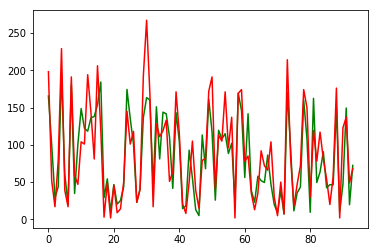

 74%|███████▎  | 25/34 [00:10<00:03,  2.45it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:162.679	val-gamma-nloglik:162.83	train-sMAPE:1.91283	val-sMAPE:1.89314
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.19334	val-gamma-nloglik:5.35078	train-sMAPE:0.384605	val-sMAPE:0.539327
Stopping. Best iteration:
[115]	train-gamma-nloglik:5.18398	val-gamma-nloglik:5.35519	train-sMAPE:0.368903	val-sMAPE:0.537452



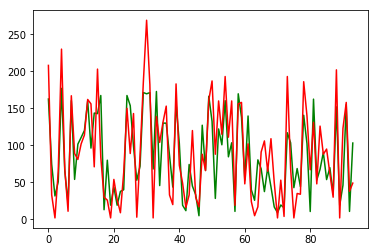

 76%|███████▋  | 26/34 [00:10<00:03,  2.46it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:159.396	val-gamma-nloglik:154.722	train-sMAPE:1.91021	val-sMAPE:1.92317
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.20255	val-gamma-nloglik:5.30368	train-sMAPE:0.340932	val-sMAPE:0.409102
Stopping. Best iteration:
[88]	train-gamma-nloglik:5.21342	val-gamma-nloglik:5.29392	train-sMAPE:0.355056	val-sMAPE:0.404481



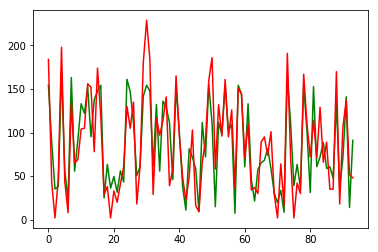

 79%|███████▉  | 27/34 [00:10<00:02,  2.49it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:135.866	val-gamma-nloglik:128.2	train-sMAPE:1.87154	val-sMAPE:1.84654
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.05468	val-gamma-nloglik:5.08718	train-sMAPE:0.460967	val-sMAPE:0.56839
[200]	train-gamma-nloglik:4.9816	val-gamma-nloglik:5.09129	train-sMAPE:0.371078	val-sMAPE:0.576121
Stopping. Best iteration:
[160]	train-gamma-nloglik:5.00668	val-gamma-nloglik:5.08301	train-sMAPE:0.402729	val-sMAPE:0.560901



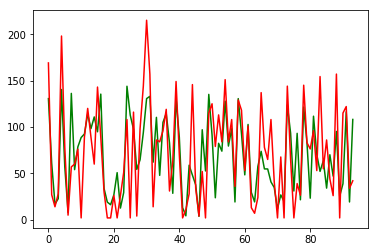

 82%|████████▏ | 28/34 [00:11<00:02,  2.48it/s]

(218, 4)
(94, 4)
8.0
[0]	train-gamma-nloglik:202.903	val-gamma-nloglik:195.035	train-sMAPE:1.95224	val-sMAPE:1.9638
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.58621	val-gamma-nloglik:5.66202	train-sMAPE:0.313973	val-sMAPE:0.404277
Stopping. Best iteration:
[116]	train-gamma-nloglik:5.57926	val-gamma-nloglik:5.65897	train-sMAPE:0.30112	val-sMAPE:0.400621



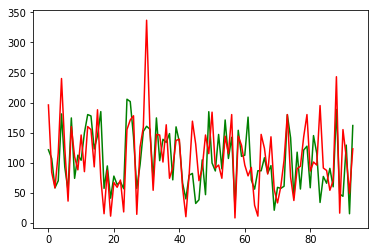

 85%|████████▌ | 29/34 [00:11<00:02,  2.49it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:175.181	val-gamma-nloglik:175.922	train-sMAPE:1.90552	val-sMAPE:1.90509
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.33057	val-gamma-nloglik:5.5078	train-sMAPE:0.379489	val-sMAPE:0.498782
Stopping. Best iteration:
[100]	train-gamma-nloglik:5.33057	val-gamma-nloglik:5.5078	train-sMAPE:0.379489	val-sMAPE:0.498782



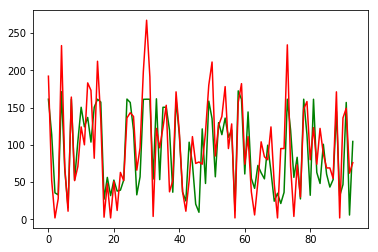

 88%|████████▊ | 30/34 [00:11<00:01,  2.51it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:126.983	val-gamma-nloglik:125.688	train-sMAPE:1.83629	val-sMAPE:1.84653
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.81526	val-gamma-nloglik:4.89863	train-sMAPE:0.424709	val-sMAPE:0.483094
[200]	train-gamma-nloglik:4.73813	val-gamma-nloglik:4.95885	train-sMAPE:0.339491	val-sMAPE:0.476293
Stopping. Best iteration:
[150]	train-gamma-nloglik:4.76611	val-gamma-nloglik:4.92476	train-sMAPE:0.372532	val-sMAPE:0.474947



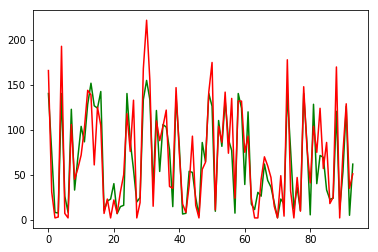

 91%|█████████ | 31/34 [00:12<00:01,  2.50it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:147.633	val-gamma-nloglik:150.367	train-sMAPE:1.82094	val-sMAPE:1.84576
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.8866	val-gamma-nloglik:5.3868	train-sMAPE:0.465142	val-sMAPE:0.548547
Stopping. Best iteration:
[113]	train-gamma-nloglik:4.87475	val-gamma-nloglik:5.40242	train-sMAPE:0.449436	val-sMAPE:0.545911



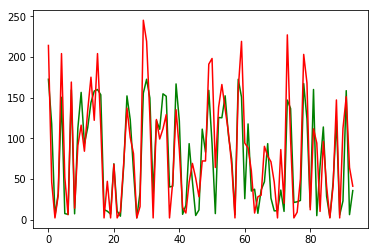

 94%|█████████▍| 32/34 [00:12<00:00,  2.51it/s]

(218, 4)
(94, 4)
2.0
[0]	train-gamma-nloglik:162.592	val-gamma-nloglik:171.537	train-sMAPE:1.90898	val-sMAPE:1.92525
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.21838	val-gamma-nloglik:5.53667	train-sMAPE:0.378712	val-sMAPE:0.452535
[200]	train-gamma-nloglik:5.17395	val-gamma-nloglik:5.58182	train-sMAPE:0.306283	val-sMAPE:0.452725
Stopping. Best iteration:
[158]	train-gamma-nloglik:5.18965	val-gamma-nloglik:5.55305	train-sMAPE:0.328492	val-sMAPE:0.447554



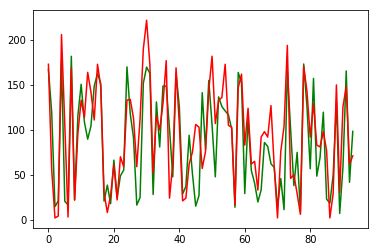

 97%|█████████▋| 33/34 [00:13<00:00,  2.49it/s]

(218, 4)
(94, 4)
8.0
[0]	train-gamma-nloglik:176.854	val-gamma-nloglik:174.611	train-sMAPE:1.94761	val-sMAPE:1.95388
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.37707	val-gamma-nloglik:5.40323	train-sMAPE:0.339121	val-sMAPE:0.388705
Stopping. Best iteration:
[107]	train-gamma-nloglik:5.37282	val-gamma-nloglik:5.40075	train-sMAPE:0.331292	val-sMAPE:0.385121



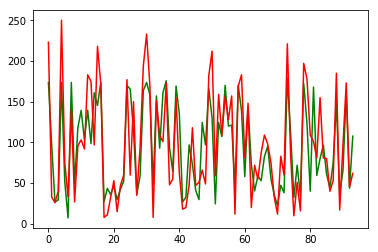

100%|██████████| 34/34 [00:13<00:00,  2.50it/s]


In [183]:
for i in tqdm(range(34)):
    trainX = np.concatenate((train_data[:,68+6*i+4:68+6*i+5],train_data[:,-115:-114],train_data[:,-110:-109],train_data[:,-104:-103]),axis = 1)
    valX = np.concatenate((val_data[:,68+6*i+4:68+6*i+5],val_data[:,-115:-114],val_data[:,-110:-109],val_data[:,-104:-103]),axis = 1)
    trainY = train_data[:, -102+3*i+2]
    valY = val_data[:, -102+3*i+2]
#     trainY = beijing_train[:, -105+3*i]
#     valY = beijing_test[:, -105+3*i]
    print(trainX.shape)
    print(valX.shape)
    print(min(valY))
    
    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':2, # 构建树的深度，越大越容易过拟合
    'lambda':1,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':1, # 随机采样训练样本
    'colsample_bytree':1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.1, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
    plt.plot(valY,'r')
    plt.show()
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/beijing/'+ str(i) +'_O3.model') # 用于存储训练出的模型

# O3大维度


  0%|          | 0/34 [00:00<?, ?it/s]

(528, 12329)
(48, 12329)
2.0
[0]	train-gamma-nloglik:162.065	val-gamma-nloglik:176.112	train-sMAPE:1.88353	val-sMAPE:1.82294
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.71369	val-gamma-nloglik:6.13154	train-sMAPE:0.82028	val-sMAPE:1.10504



Exception in thread Thread-364:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/lifuzhen/virtual_pytorch_py3.5/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/lifuzhen/virtual_pytorch_py3.5/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



[200]	train-gamma-nloglik:5.04652	val-gamma-nloglik:5.29275	train-sMAPE:0.239828	val-sMAPE:0.744212
[300]	train-gamma-nloglik:5.00669	val-gamma-nloglik:5.25665	train-sMAPE:0.144661	val-sMAPE:0.716031
[400]	train-gamma-nloglik:4.99102	val-gamma-nloglik:5.24288	train-sMAPE:0.096942	val-sMAPE:0.706811
Stopping. Best iteration:
[444]	train-gamma-nloglik:4.98702	val-gamma-nloglik:5.24139	train-sMAPE:0.083588	val-sMAPE:0.704989



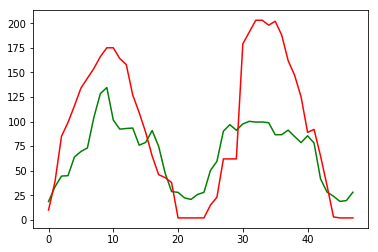

  3%|▎         | 1/34 [00:25<13:53, 25.27s/it]

(528, 12329)
(48, 12329)
2.0
[0]	train-gamma-nloglik:142.235	val-gamma-nloglik:177.35	train-sMAPE:1.89234	val-sMAPE:1.89804
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:5.44687	val-gamma-nloglik:6.25054	train-sMAPE:0.71935	val-sMAPE:1.01396


KeyboardInterrupt: 

In [331]:
# for i in tqdm(range(34)):
#     trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,68:12093],train_data[:,12093+288*i:12093+288*(i+1)],train_data[:,-117:-116],train_data[:,-115:-102]),axis = 1)
#     valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,68:12093],val_data[:,12093+288*i:12093+288*(i+1)],val_data[:,-117:-116],val_data[:,-115:-102]),axis = 1)
#     trainY = train_data[:, -102+3*i+2]
#     valY = val_data[:, -102+3*i+2]
# #     trainY = beijing_train[:, -105+3*i]
# #     valY = beijing_test[:, -105+3*i]
#     print(trainX.shape)
#     print(valX.shape)
#     print(min(valY))
    
#     params={
#     'booster':'gbtree',
#     'objective': 'reg:gamma', #多分类的问题
#     # 'num_class':2, # 类别数，与 multisoftmax 并用
#     'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
#     'max_depth':2, # 构建树的深度，越大越容易过拟合
#     'lambda':1,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
#     'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
#     'subsample':0.8, # 随机采样训练样本
#     'colsample_bytree':1, # 生成树时进行的列采样
#     'min_child_weight':1, 
#     # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#     #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#     #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
#     'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
#     'eta': 0.05, # 如同学习率
#     'seed':1000,
#     'nthread':-1,# cpu 线程数
# #     'eval_metric':['mae','rmse']
#     }

#     plst = list(params.items())
#     num_rounds = 600 # 迭代次数
#     xgb_train = xgb.DMatrix(trainX, label= trainY)
#     xgb_val = xgb.DMatrix(valX, label= valY)
#     watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
#     #训练模型并保存
#     # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
#     model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
#     plt.plot(model_PM10.predict(xgb.DMatrix(valX)),'g')
#     plt.plot(valY,'r')
#     plt.show()
#     model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/beijing/'+ str(i) +'_O3.model') # 用于存储训练出的模型

# London

In [184]:
import xgboost as xgb
from sklearn.cross_validation import train_test_split
train_data, val_data = train_test_split(London_train, test_size = 0.3, random_state = 1)
# train_data, val_data = London_train[:-48,:], London_train[-48:,:]###随机数原始为1

# PM2.5

In [185]:
for i in tqdm(range(13)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,26:2185],train_data[:,2185+144*i:2185+144*(i+1)],train_data[:,-34:-26]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,26:2185],val_data[:,2185+144*i:2185+144*(i+1)],val_data[:,-34:-26]),axis = 1)
    trainY = train_data[:, -26+2*i]
    valY = val_data[:, -26+2*i]
    trainY[trainY <= 0] = 0.1
    valY[valY <= 0] = 0.1
#     trainY = London_train[:, -26+2*i]
#     valY = London_test[:, -26+2*i]
    print(trainX.shape)
    print(valX.shape)

    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':5, # 构建树的深度，越大越容易过拟合
    'lambda':0,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.9, # 随机采样训练样本
    'colsample_bytree':1, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.05, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval = 100,feval=sMAPE)
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/London/'+ str(i) +'_PM2.5.model') # 用于存储训练出的模型

  0%|          | 0/13 [00:00<?, ?it/s]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:23.2056	val-gamma-nloglik:23.8637	train-sMAPE:1.82831	val-sMAPE:1.83141
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.50397	val-gamma-nloglik:3.54586	train-sMAPE:0.136411	val-sMAPE:0.190451
[200]	train-gamma-nloglik:3.49173	val-gamma-nloglik:3.52795	train-sMAPE:0.004897	val-sMAPE:0.119347
[300]	train-gamma-nloglik:3.49171	val-gamma-nloglik:3.52781	train-sMAPE:0.000927	val-sMAPE:0.118827
[400]	train-gamma-nloglik:3.49171	val-gamma-nloglik:3.5278	train-sMAPE:0.00035	val-sMAPE:0.11877
Stopping. Best iteration:
[410]	train-gamma-nloglik:3.49171	val-gamma-nloglik:3.5278	train-sMAPE:0.000346	val-sMAPE:0.118768



  8%|▊         | 1/13 [00:10<02:05, 10.47s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:21.4874	val-gamma-nloglik:18.6505	train-sMAPE:1.6688	val-sMAPE:1.68385
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.03317	val-gamma-nloglik:3.17332	train-sMAPE:0.167123	val-sMAPE:0.385904
[200]	train-gamma-nloglik:3.00829	val-gamma-nloglik:3.15915	train-sMAPE:0.012744	val-sMAPE:0.350637
Stopping. Best iteration:
[214]	train-gamma-nloglik:3.00823	val-gamma-nloglik:3.15903	train-sMAPE:0.00963	val-sMAPE:0.350196



 15%|█▌        | 2/13 [00:17<01:35,  8.68s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:25.1789	val-gamma-nloglik:21.7162	train-sMAPE:1.78334	val-sMAPE:1.76984
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.39396	val-gamma-nloglik:3.31917	train-sMAPE:0.155156	val-sMAPE:0.226912
Stopping. Best iteration:
[142]	train-gamma-nloglik:3.37281	val-gamma-nloglik:3.31094	train-sMAPE:0.038536	val-sMAPE:0.194652



 23%|██▎       | 3/13 [00:22<01:13,  7.40s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:27.314	val-gamma-nloglik:27.9531	train-sMAPE:1.82319	val-sMAPE:1.83341
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.56948	val-gamma-nloglik:3.6339	train-sMAPE:0.156339	val-sMAPE:0.228356
[200]	train-gamma-nloglik:3.551	val-gamma-nloglik:3.6116	train-sMAPE:0.006968	val-sMAPE:0.124945
Stopping. Best iteration:
[216]	train-gamma-nloglik:3.55099	val-gamma-nloglik:3.61158	train-sMAPE:0.005588	val-sMAPE:0.124685



 31%|███       | 4/13 [00:28<01:04,  7.18s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:26.9806	val-gamma-nloglik:22.8219	train-sMAPE:1.76488	val-sMAPE:1.75247
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.36002	val-gamma-nloglik:3.51444	train-sMAPE:0.206977	val-sMAPE:0.395861
[200]	train-gamma-nloglik:3.32159	val-gamma-nloglik:3.54175	train-sMAPE:0.012596	val-sMAPE:0.353919
[300]	train-gamma-nloglik:3.32147	val-gamma-nloglik:3.5433	train-sMAPE:0.001631	val-sMAPE:0.352596
[400]	train-gamma-nloglik:3.32146	val-gamma-nloglik:3.54331	train-sMAPE:0.000346	val-sMAPE:0.352479
Stopping. Best iteration:
[379]	train-gamma-nloglik:3.32146	val-gamma-nloglik:3.54331	train-sMAPE:0.000394	val-sMAPE:0.352477



 38%|███▊      | 5/13 [00:38<01:02,  7.77s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:29.15	val-gamma-nloglik:26.1438	train-sMAPE:1.80841	val-sMAPE:1.80519
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.53436	val-gamma-nloglik:3.51227	train-sMAPE:0.16949	val-sMAPE:0.240676
[200]	train-gamma-nloglik:3.50737	val-gamma-nloglik:3.48912	train-sMAPE:0.008322	val-sMAPE:0.172344
[300]	train-gamma-nloglik:3.50731	val-gamma-nloglik:3.48895	train-sMAPE:0.001543	val-sMAPE:0.171657
[400]	train-gamma-nloglik:3.50731	val-gamma-nloglik:3.48894	train-sMAPE:0.000371	val-sMAPE:0.171605
Stopping. Best iteration:
[368]	train-gamma-nloglik:3.50731	val-gamma-nloglik:3.48894	train-sMAPE:0.000529	val-sMAPE:0.171604



 46%|████▌     | 6/13 [00:49<00:57,  8.25s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:27.9215	val-gamma-nloglik:24.3591	train-sMAPE:1.77498	val-sMAPE:1.77718
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.43329	val-gamma-nloglik:3.40967	train-sMAPE:0.178328	val-sMAPE:0.255258
[200]	train-gamma-nloglik:3.40461	val-gamma-nloglik:3.38951	train-sMAPE:0.010929	val-sMAPE:0.194762
Stopping. Best iteration:
[212]	train-gamma-nloglik:3.40458	val-gamma-nloglik:3.38944	train-sMAPE:0.008885	val-sMAPE:0.1946



 54%|█████▍    | 7/13 [00:56<00:48,  8.03s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:33.8978	val-gamma-nloglik:32.5564	train-sMAPE:1.84777	val-sMAPE:1.84749
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.7608	val-gamma-nloglik:3.79229	train-sMAPE:0.200122	val-sMAPE:0.272139
[200]	train-gamma-nloglik:3.72653	val-gamma-nloglik:3.75535	train-sMAPE:0.012069	val-sMAPE:0.206015
Stopping. Best iteration:
[237]	train-gamma-nloglik:3.72645	val-gamma-nloglik:3.75509	train-sMAPE:0.00617	val-sMAPE:0.205904



 62%|██████▏   | 8/13 [01:03<00:39,  7.91s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:48.5032	val-gamma-nloglik:48.349	train-sMAPE:1.86247	val-sMAPE:1.86482
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.025	val-gamma-nloglik:4.0417	train-sMAPE:0.255556	val-sMAPE:0.268906
[200]	train-gamma-nloglik:3.96874	val-gamma-nloglik:3.98814	train-sMAPE:0.002108	val-sMAPE:0.043756
Stopping. Best iteration:
[242]	train-gamma-nloglik:3.96874	val-gamma-nloglik:3.98813	train-sMAPE:0.000401	val-sMAPE:0.043596



 69%|██████▉   | 9/13 [01:10<00:31,  7.82s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:20.53	val-gamma-nloglik:18.6479	train-sMAPE:1.73992	val-sMAPE:1.73801
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.19233	val-gamma-nloglik:3.17565	train-sMAPE:0.125489	val-sMAPE:0.195229
[200]	train-gamma-nloglik:3.17736	val-gamma-nloglik:3.1595	train-sMAPE:0.005571	val-sMAPE:0.140445
[300]	train-gamma-nloglik:3.17733	val-gamma-nloglik:3.15926	train-sMAPE:0.001103	val-sMAPE:0.139366
[400]	train-gamma-nloglik:3.17733	val-gamma-nloglik:3.15924	train-sMAPE:0.000368	val-sMAPE:0.139281
[500]	train-gamma-nloglik:3.17733	val-gamma-nloglik:3.15924	train-sMAPE:0.000355	val-sMAPE:0.139277
Stopping. Best iteration:
[451]	train-gamma-nloglik:3.17733	val-gamma-nloglik:3.15924	train-sMAPE:0.000357	val-sMAPE:0.139277



 77%|███████▋  | 10/13 [01:20<00:24,  8.09s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:17.1328	val-gamma-nloglik:16.3392	train-sMAPE:1.59244	val-sMAPE:1.5412
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:2.28918	val-gamma-nloglik:2.32447	train-sMAPE:0.107994	val-sMAPE:0.28805
[200]	train-gamma-nloglik:2.27767	val-gamma-nloglik:2.30017	train-sMAPE:0.003272	val-sMAPE:0.219471
[300]	train-gamma-nloglik:2.27766	val-gamma-nloglik:2.29993	train-sMAPE:0.000653	val-sMAPE:0.219026
[400]	train-gamma-nloglik:2.27766	val-gamma-nloglik:2.29991	train-sMAPE:0.000316	val-sMAPE:0.218952
Stopping. Best iteration:
[381]	train-gamma-nloglik:2.27766	val-gamma-nloglik:2.29991	train-sMAPE:0.00032	val-sMAPE:0.21895



 85%|████████▍ | 11/13 [01:30<00:16,  8.21s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:26.926	val-gamma-nloglik:23.5117	train-sMAPE:1.78497	val-sMAPE:1.78366
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.44355	val-gamma-nloglik:3.45762	train-sMAPE:0.172801	val-sMAPE:0.309718
[200]	train-gamma-nloglik:3.4157	val-gamma-nloglik:3.43042	train-sMAPE:0.012001	val-sMAPE:0.269206
[300]	train-gamma-nloglik:3.41559	val-gamma-nloglik:3.43004	train-sMAPE:0.002164	val-sMAPE:0.268814
Stopping. Best iteration:
[250]	train-gamma-nloglik:3.41561	val-gamma-nloglik:3.43004	train-sMAPE:0.004724	val-sMAPE:0.268725



 92%|█████████▏| 12/13 [01:37<00:08,  8.12s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:34.2609	val-gamma-nloglik:29.3337	train-sMAPE:1.84608	val-sMAPE:1.8401
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.73781	val-gamma-nloglik:3.65947	train-sMAPE:0.189545	val-sMAPE:0.191226
Stopping. Best iteration:
[135]	train-gamma-nloglik:3.70503	val-gamma-nloglik:3.64365	train-sMAPE:0.046113	val-sMAPE:0.150319



100%|██████████| 13/13 [01:42<00:00,  7.85s/it]


# PM10

In [186]:
for i in tqdm(range(13)):
    trainX = np.concatenate((train_data[:,2*i:2*(i+1)],train_data[:,26:2185],train_data[:,2185+144*i:2185+144*(i+1)],train_data[:,-34:-26]),axis = 1)
    valX = np.concatenate((val_data[:,2*i:2*(i+1)],val_data[:,26:2185],val_data[:,2185+144*i:2185+144*(i+1)],val_data[:,-34:-26]),axis = 1)
    trainY = train_data[:, -26+2*i+1]
    valY = val_data[:, -26+2*i+1]
    trainY[trainY <= 0] = 0.1
    valY[valY <= 0] = 0.1
#     trainY = London_train[:, -26+2*i+1]
#     valY = London_test[:, -26+2*i+1]
    print(trainX.shape)
    print(valX.shape)

    params={
    'booster':'gbtree',
    'objective': 'reg:gamma', #多分类的问题
    # 'num_class':2, # 类别数，与 multisoftmax 并用
    'gamma':0,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth':2, # 构建树的深度，越大越容易过拟合
    'lambda':100,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
    'alpha':0,      # 控制模型复杂度的权重值的L1正则化项参数，参数越大，模型越不容易过拟合。
    'subsample':0.9, # 随机采样训练样本
    'colsample_bytree':0.2, # 生成树时进行的列采样
    'min_child_weight':1, 
    # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
    #，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
    #这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。 
    'silent':0 ,#设置成1则没有运行信息输出，最好是设置为0.
    'eta': 0.05, # 如同学习率
    'seed':1000,
    'nthread':-1,# cpu 线程数
#     'eval_metric':['mae','rmse']
    }

    plst = list(params.items())
    num_rounds = 600 # 迭代次数
    xgb_train = xgb.DMatrix(trainX, label= trainY)
    xgb_val = xgb.DMatrix(valX, label= valY)
    watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]
    #训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model_PM10 = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=50,verbose_eval=100,feval=sMAPE)
    model_PM10.save_model('/home/lifuzhen/KDD2018/Mini_train/London/'+ str(i) +'_PM10.model') # 用于存储训练出的模型

  0%|          | 0/13 [00:00<?, ?it/s]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:46.0929	val-gamma-nloglik:42.9346	train-sMAPE:1.89485	val-sMAPE:1.8943
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.27355	val-gamma-nloglik:4.18569	train-sMAPE:0.381101	val-sMAPE:0.347626
[200]	train-gamma-nloglik:4.10247	val-gamma-nloglik:4.0722	train-sMAPE:0.146468	val-sMAPE:0.186538
[300]	train-gamma-nloglik:4.08938	val-gamma-nloglik:4.06695	train-sMAPE:0.103591	val-sMAPE:0.167822
[400]	train-gamma-nloglik:4.08505	val-gamma-nloglik:4.06544	train-sMAPE:0.08231	val-sMAPE:0.160417
[500]	train-gamma-nloglik:4.08272	val-gamma-nloglik:4.06469	train-sMAPE:0.067401	val-sMAPE:0.156364
[599]	train-gamma-nloglik:4.08136	val-gamma-nloglik:4.06428	train-sMAPE:0.05714	val-sMAPE:0.153782


  8%|▊         | 1/13 [00:04<00:51,  4.26s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:40.1757	val-gamma-nloglik:35.8388	train-sMAPE:1.87106	val-sMAPE:1.86624
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.1045	val-gamma-nloglik:3.96336	train-sMAPE:0.378315	val-sMAPE:0.335729
[200]	train-gamma-nloglik:3.9376	val-gamma-nloglik:3.86454	train-sMAPE:0.181753	val-sMAPE:0.183534
[300]	train-gamma-nloglik:3.92123	val-gamma-nloglik:3.85892	train-sMAPE:0.13756	val-sMAPE:0.172137
[400]	train-gamma-nloglik:3.91484	val-gamma-nloglik:3.85641	train-sMAPE:0.110432	val-sMAPE:0.166713
[500]	train-gamma-nloglik:3.9113	val-gamma-nloglik:3.85525	train-sMAPE:0.091783	val-sMAPE:0.161805
[599]	train-gamma-nloglik:3.90909	val-gamma-nloglik:3.85465	train-sMAPE:0.077911	val-sMAPE:0.158618


 15%|█▌        | 2/13 [00:08<00:47,  4.30s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:36.978	val-gamma-nloglik:33.4899	train-sMAPE:1.85972	val-sMAPE:1.85158
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.00561	val-gamma-nloglik:3.89201	train-sMAPE:0.360709	val-sMAPE:0.358067
[200]	train-gamma-nloglik:3.843	val-gamma-nloglik:3.78059	train-sMAPE:0.178144	val-sMAPE:0.211307
[300]	train-gamma-nloglik:3.82958	val-gamma-nloglik:3.77356	train-sMAPE:0.138067	val-sMAPE:0.200537
[400]	train-gamma-nloglik:3.82473	val-gamma-nloglik:3.77136	train-sMAPE:0.116005	val-sMAPE:0.196411
[500]	train-gamma-nloglik:3.82202	val-gamma-nloglik:3.76982	train-sMAPE:0.09955	val-sMAPE:0.193122
[599]	train-gamma-nloglik:3.82017	val-gamma-nloglik:3.76862	train-sMAPE:0.085956	val-sMAPE:0.189644


 23%|██▎       | 3/13 [00:12<00:42,  4.25s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:47.0676	val-gamma-nloglik:47.0179	train-sMAPE:1.89816	val-sMAPE:1.90261
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.29552	val-gamma-nloglik:4.31141	train-sMAPE:0.407482	val-sMAPE:0.410621
[200]	train-gamma-nloglik:4.13553	val-gamma-nloglik:4.16409	train-sMAPE:0.156853	val-sMAPE:0.186885
[300]	train-gamma-nloglik:4.12732	val-gamma-nloglik:4.15899	train-sMAPE:0.113152	val-sMAPE:0.162689
[400]	train-gamma-nloglik:4.12394	val-gamma-nloglik:4.15671	train-sMAPE:0.092066	val-sMAPE:0.150254
[500]	train-gamma-nloglik:4.12173	val-gamma-nloglik:4.15529	train-sMAPE:0.077196	val-sMAPE:0.142768
[599]	train-gamma-nloglik:4.12032	val-gamma-nloglik:4.15442	train-sMAPE:0.066755	val-sMAPE:0.138804


 31%|███       | 4/13 [00:16<00:37,  4.22s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:39.0012	val-gamma-nloglik:34.6263	train-sMAPE:1.867	val-sMAPE:1.86295
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.07716	val-gamma-nloglik:3.93956	train-sMAPE:0.377302	val-sMAPE:0.358562
[200]	train-gamma-nloglik:3.91191	val-gamma-nloglik:3.84796	train-sMAPE:0.202274	val-sMAPE:0.238556
[300]	train-gamma-nloglik:3.89504	val-gamma-nloglik:3.84131	train-sMAPE:0.154941	val-sMAPE:0.225475
[400]	train-gamma-nloglik:3.88811	val-gamma-nloglik:3.83882	train-sMAPE:0.126591	val-sMAPE:0.216922
[500]	train-gamma-nloglik:3.88412	val-gamma-nloglik:3.83684	train-sMAPE:0.107103	val-sMAPE:0.208728
[599]	train-gamma-nloglik:3.88156	val-gamma-nloglik:3.83594	train-sMAPE:0.092197	val-sMAPE:0.204386


 38%|███▊      | 5/13 [00:21<00:33,  4.21s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:44.2047	val-gamma-nloglik:40.0533	train-sMAPE:1.89031	val-sMAPE:1.88761
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.22511	val-gamma-nloglik:4.10477	train-sMAPE:0.353403	val-sMAPE:0.328758
[200]	train-gamma-nloglik:4.05208	val-gamma-nloglik:3.99956	train-sMAPE:0.149612	val-sMAPE:0.175945
[300]	train-gamma-nloglik:4.03976	val-gamma-nloglik:3.99404	train-sMAPE:0.107646	val-sMAPE:0.162928
[400]	train-gamma-nloglik:4.03622	val-gamma-nloglik:3.99194	train-sMAPE:0.088187	val-sMAPE:0.155408
[500]	train-gamma-nloglik:4.03437	val-gamma-nloglik:3.99046	train-sMAPE:0.073485	val-sMAPE:0.149762
[599]	train-gamma-nloglik:4.03327	val-gamma-nloglik:3.98963	train-sMAPE:0.06282	val-sMAPE:0.146496


 46%|████▌     | 6/13 [00:25<00:29,  4.19s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:45.076	val-gamma-nloglik:39.8822	train-sMAPE:1.88582	val-sMAPE:1.88521
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.23814	val-gamma-nloglik:4.09423	train-sMAPE:0.384908	val-sMAPE:0.321474
[200]	train-gamma-nloglik:4.04978	val-gamma-nloglik:3.98743	train-sMAPE:0.18285	val-sMAPE:0.181561
[300]	train-gamma-nloglik:4.03428	val-gamma-nloglik:3.98205	train-sMAPE:0.132382	val-sMAPE:0.178409
[400]	train-gamma-nloglik:4.0292	val-gamma-nloglik:3.98082	train-sMAPE:0.107227	val-sMAPE:0.175758
[500]	train-gamma-nloglik:4.02654	val-gamma-nloglik:3.97994	train-sMAPE:0.091044	val-sMAPE:0.171328
[599]	train-gamma-nloglik:4.02483	val-gamma-nloglik:3.97922	train-sMAPE:0.078791	val-sMAPE:0.16718


 54%|█████▍    | 7/13 [00:29<00:25,  4.19s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:47.8341	val-gamma-nloglik:45.1241	train-sMAPE:1.9023	val-sMAPE:1.90138
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.32239	val-gamma-nloglik:4.24642	train-sMAPE:0.378738	val-sMAPE:0.35465
[200]	train-gamma-nloglik:4.15681	val-gamma-nloglik:4.13121	train-sMAPE:0.153522	val-sMAPE:0.171666
[300]	train-gamma-nloglik:4.14556	val-gamma-nloglik:4.12539	train-sMAPE:0.111797	val-sMAPE:0.157794
[400]	train-gamma-nloglik:4.14185	val-gamma-nloglik:4.12363	train-sMAPE:0.090604	val-sMAPE:0.152026
[500]	train-gamma-nloglik:4.13982	val-gamma-nloglik:4.12275	train-sMAPE:0.077279	val-sMAPE:0.150393
[599]	train-gamma-nloglik:4.13848	val-gamma-nloglik:4.12204	train-sMAPE:0.067225	val-sMAPE:0.147798


 62%|██████▏   | 8/13 [00:33<00:21,  4.21s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:41.9386	val-gamma-nloglik:37.5351	train-sMAPE:1.88708	val-sMAPE:1.884
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.16825	val-gamma-nloglik:4.03555	train-sMAPE:0.366868	val-sMAPE:0.328622
[200]	train-gamma-nloglik:4.0144	val-gamma-nloglik:3.95271	train-sMAPE:0.156217	val-sMAPE:0.172544
[300]	train-gamma-nloglik:4.00306	val-gamma-nloglik:3.94984	train-sMAPE:0.11758	val-sMAPE:0.16583
[400]	train-gamma-nloglik:3.99929	val-gamma-nloglik:3.94862	train-sMAPE:0.095706	val-sMAPE:0.160875
[500]	train-gamma-nloglik:3.99722	val-gamma-nloglik:3.94783	train-sMAPE:0.080508	val-sMAPE:0.156328
[599]	train-gamma-nloglik:3.99593	val-gamma-nloglik:3.94751	train-sMAPE:0.069441	val-sMAPE:0.154764


 69%|██████▉   | 9/13 [00:37<00:16,  4.21s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:33.4495	val-gamma-nloglik:30.4631	train-sMAPE:1.8496	val-sMAPE:1.84525
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.90281	val-gamma-nloglik:3.7952	train-sMAPE:0.359107	val-sMAPE:0.329883
[200]	train-gamma-nloglik:3.76145	val-gamma-nloglik:3.70492	train-sMAPE:0.180404	val-sMAPE:0.192267
[300]	train-gamma-nloglik:3.74675	val-gamma-nloglik:3.6968	train-sMAPE:0.138385	val-sMAPE:0.170097
[400]	train-gamma-nloglik:3.74097	val-gamma-nloglik:3.69403	train-sMAPE:0.111354	val-sMAPE:0.158545
[500]	train-gamma-nloglik:3.73778	val-gamma-nloglik:3.69255	train-sMAPE:0.092893	val-sMAPE:0.152316
[599]	train-gamma-nloglik:3.7358	val-gamma-nloglik:3.69184	train-sMAPE:0.079387	val-sMAPE:0.14858


 77%|███████▋  | 10/13 [00:41<00:12,  4.20s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:35.001	val-gamma-nloglik:30.0632	train-sMAPE:1.72982	val-sMAPE:1.69649
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:3.54125	val-gamma-nloglik:3.39778	train-sMAPE:0.45685	val-sMAPE:0.523851
[200]	train-gamma-nloglik:3.32037	val-gamma-nloglik:3.21233	train-sMAPE:0.217511	val-sMAPE:0.322045
[300]	train-gamma-nloglik:3.28989	val-gamma-nloglik:3.18096	train-sMAPE:0.161548	val-sMAPE:0.284186
[400]	train-gamma-nloglik:3.27413	val-gamma-nloglik:3.16359	train-sMAPE:0.12666	val-sMAPE:0.261898
[500]	train-gamma-nloglik:3.26524	val-gamma-nloglik:3.15478	train-sMAPE:0.102372	val-sMAPE:0.249661
[599]	train-gamma-nloglik:3.26019	val-gamma-nloglik:3.15161	train-sMAPE:0.084324	val-sMAPE:0.240504


 85%|████████▍ | 11/13 [00:46<00:08,  4.20s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:52.5063	val-gamma-nloglik:45.9863	train-sMAPE:1.90727	val-sMAPE:1.90216
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.43243	val-gamma-nloglik:4.25353	train-sMAPE:0.387595	val-sMAPE:0.357204
[200]	train-gamma-nloglik:4.24549	val-gamma-nloglik:4.15709	train-sMAPE:0.194744	val-sMAPE:0.218265
[300]	train-gamma-nloglik:4.22509	val-gamma-nloglik:4.15005	train-sMAPE:0.155532	val-sMAPE:0.197269
[400]	train-gamma-nloglik:4.21582	val-gamma-nloglik:4.14706	train-sMAPE:0.128076	val-sMAPE:0.185841
[500]	train-gamma-nloglik:4.21001	val-gamma-nloglik:4.1456	train-sMAPE:0.10816	val-sMAPE:0.181302
[599]	train-gamma-nloglik:4.20629	val-gamma-nloglik:4.14494	train-sMAPE:0.093395	val-sMAPE:0.179221


 92%|█████████▏| 12/13 [00:50<00:04,  4.21s/it]

(218, 2313)
(94, 2313)
[0]	train-gamma-nloglik:61.8332	val-gamma-nloglik:55.3065	train-sMAPE:1.92638	val-sMAPE:1.92323
Multiple eval metrics have been passed: 'val-sMAPE' will be used for early stopping.

Will train until val-sMAPE hasn't improved in 50 rounds.
[100]	train-gamma-nloglik:4.63177	val-gamma-nloglik:4.46262	train-sMAPE:0.408978	val-sMAPE:0.357475
[200]	train-gamma-nloglik:4.43011	val-gamma-nloglik:4.35217	train-sMAPE:0.15688	val-sMAPE:0.147991
[300]	train-gamma-nloglik:4.41477	val-gamma-nloglik:4.34858	train-sMAPE:0.115917	val-sMAPE:0.140796
[400]	train-gamma-nloglik:4.40931	val-gamma-nloglik:4.34737	train-sMAPE:0.092507	val-sMAPE:0.135942
[500]	train-gamma-nloglik:4.40641	val-gamma-nloglik:4.34686	train-sMAPE:0.075228	val-sMAPE:0.132595
[599]	train-gamma-nloglik:4.40474	val-gamma-nloglik:4.34672	train-sMAPE:0.062767	val-sMAPE:0.132261


100%|██████████| 13/13 [00:54<00:00,  4.22s/it]


# predict

In [168]:
import requests
for i in range(18,19):
    for j in range(0,24):
        end   = '2018-05-'+str(i).zfill(2)+'-'+str(j)
        url = 'http://kdd.caiyunapp.com/competition/forecast/bj/'+end+'/2k0d1d8'
        respones= requests.get(url)
        with open ('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours'+'_'+end+'.csv','w') as f:
            f.write(respones.text)
        print('finished!')

for i in range(18,19):
    for j in range(0,24):
        end   = '2018-05-'+str(i).zfill(2)+'-'+str(j)
        url = 'http://kdd.caiyunapp.com/competition/forecast/ld/'+end+'/2k0d1d8'
        respones= requests.get(url)
        with open ('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours'+'_'+end+'.csv','w') as f:
            f.write(respones.text)
        print('finished')

finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished!
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished
finished


In [187]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import timedelta
from datetime import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

def gen_dates(b_date, count):
    hour = timedelta(hours=1)
    for i in range(count+1):
        yield b_date + hour*i


def get_date_list(start=None, end=None):
    """
    获取日期列表
    :param start: 开始日期
    :param end: 结束日期
    :return:
    """
    if start is None:
        start = datetime.strptime("2000-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
    if end is None:
        end = datetime.now()
    data = []
    for d in gen_dates(start, int((end-start).total_seconds()/3600)):
        data.append(str(d))
    return data


Medium_PM10 = 88
Medium_PM25 = 59
Medium_O3   = 56
Medium_NO2  = 46
Medium_CO   = 1
Medium_SO2  = 9
def to_timedict_bj(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Predict/bj_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('stationId','utc_time','PM2.5','PM10','NO2','CO','O3','SO2'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration','CO_Concentration','O3_Concentration','SO2_Concentration']]).tolist()
    for i in tqdm(['aotizhongxin', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihuayuan', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuiku', 'nansanhuan', 'nongzhanguan', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxigong','xizhimenbei','yanqin','yizhuang','yongdingmennei','yongledian','yufa','yungang']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.reset_index(drop=True,inplace=True)
#     recons.loc[recons['stationId'] == 'zhiwuyuan_aq',['PM2.5','PM10','NO2','CO','O3','SO2']] = [Medium_PM25,Medium_PM10,Medium_NO2,Medium_CO,Medium_O3,Medium_SO2]

#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['stationId'] == 'zhiwuyuan_aq'])
    recons['PM2.5'].fillna(Medium_PM25, inplace = True)
    recons['PM10'].fillna(Medium_PM10, inplace = True)
    recons['NO2'].fillna(Medium_NO2, inplace = True)
    recons['CO'].fillna(Medium_CO, inplace = True)
    recons['O3'].fillna(Medium_O3, inplace = True)
    recons['SO2'].fillna(Medium_SO2, inplace = True)
    
    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['stationId']=='dongsi_aq',['lon','lat']] = [116.417,39.929]
    recons.loc[recons['stationId']=='tiantan_aq',['lon','lat']] = [116.407,39.886]
    recons.loc[recons['stationId']=='guanyuan_aq',['lon','lat']] = [116.339,39.929]
    recons.loc[recons['stationId']=='wanshouxigong_aq',['lon','lat']] = [116.352,39.878]
    recons.loc[recons['stationId']=='aotizhongxin_aq',['lon','lat']] = [116.397,39.982]
    recons.loc[recons['stationId']=='nongzhanguan_aq',['lon','lat']] = [116.461,39.937]
    recons.loc[recons['stationId']=='wanliu_aq',['lon','lat']] = [116.287,39.987]
    recons.loc[recons['stationId']=='beibuxinqu_aq',['lon','lat']] = [116.174,40.09]
    recons.loc[recons['stationId']=='zhiwuyuan_aq',['lon','lat']] = [116.207,40.002]
    recons.loc[recons['stationId']=='fengtaihuayuan_aq',['lon','lat']] = [116.279,39.863]
    recons.loc[recons['stationId']=='yungang_aq',['lon','lat']] = [116.146,39.824]
    recons.loc[recons['stationId']=='gucheng_aq',['lon','lat']] = [116.184,39.914]
    recons.loc[recons['stationId']=='fangshan_aq',['lon','lat']] = [116.136,39.742]
    recons.loc[recons['stationId']=='daxing_aq',['lon','lat']] = [116.404,39.718]
    recons.loc[recons['stationId']=='yizhuang_aq',['lon','lat']] = [116.506,39.795]
    recons.loc[recons['stationId']=='tongzhou_aq',['lon','lat']] = [116.663,39.886]
    recons.loc[recons['stationId']=='shunyi_aq',['lon','lat']] = [116.655,40.127]
    recons.loc[recons['stationId']=='pingchang_aq',['lon','lat']] = [116.23,40.217]
    recons.loc[recons['stationId']=='mentougou_aq',['lon','lat']] = [116.106,39.937]
    recons.loc[recons['stationId']=='pinggu_aq',['lon','lat']] = [117.1,40.143]
    recons.loc[recons['stationId']=='hureconsou_aq',['lon','lat']] = [116.628,40.328]
    recons.loc[recons['stationId']=='miyun_aq',['lon','lat']] = [116.832,40.37]
    recons.loc[recons['stationId']=='yanqin_aq',['lon','lat']] = [115.972,40.453]
    recons.loc[recons['stationId']=='dingling_aq',['lon','lat']] = [116.22,40.292]
    recons.loc[recons['stationId']=='badaling_aq',['lon','lat']] = [115.988,40.365]
    recons.loc[recons['stationId']=='miyunshuiku_aq',['lon','lat']] = [116.911,40.499]
    recons.loc[recons['stationId']=='donggaocun_aq',['lon','lat']] = [117.12,40.1]
    recons.loc[recons['stationId']=='yongledian_aq',['lon','lat']] = [116.783,39.712]
    recons.loc[recons['stationId']=='yufa_aq',['lon','lat']] = [116.3,39.52]
    recons.loc[recons['stationId']=='liulihe_aq',['lon','lat']] = [116,39.58]
    recons.loc[recons['stationId']=='qianmen_aq',['lon','lat']] = [116.395,39.899]
    recons.loc[recons['stationId']=='yongdingmennei_aq',['lon','lat']] = [116.394,39.876]
    recons.loc[recons['stationId']=='xizhimenbei_aq',['lon','lat']] = [116.349,39.954]
    recons.loc[recons['stationId']=='nansanhuan_aq',['lon','lat']] = [116.368,39.856]
    recons.loc[recons['stationId']=='dongsihuan_aq',['lon','lat']] = [116.483,39.939]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5','PM10','NO2','CO','O3','SO2']]).tolist()
    for i in tqdm(np.array(recons['utc_time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
        
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) == 0:
            if int(k.split(' ')[1].split(':')[0]) != 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
            else:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 272:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    ######################处理缺失时间点完毕#####################shunyi_meo


    recons_meo = pd.DataFrame(columns=('station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather'))

    alt = np.array(meo[['station_id','time','temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    for i in tqdm(['shunyi_meo','hadian_meo','yanqing_meo','miyun_meo','huairou_meo','shangdianzi_meo','pinggu_meo','tongzhou_meo','chaoyang_meo','pingchang_meo','zhaitang_meo','mentougou_meo','beijing_meo','shijingshan_meo','fengtai_meo','daxing_meo','fangshan_meo','xiayunling_meo']):
        count = 0
        for j in meo['station_id']:
            if j == i:
                recons_meo.loc[count] = alt[count]
            count += 1 
    
    for i in range(len(recons_meo['wind_speed'])):
        if recons_meo['wind_speed'][i] == 999017:
            recons_meo.loc[i,'wind_speed'] = recons_meo.loc[i-1,'wind_speed']
    recons_meo['longitude'] = 0 ##经度
    recons_meo['latitude'] = 0  ##纬度
    recons_meo.loc[recons_meo['station_id']=='shunyi_meo',['longitude','latitude']] = [116.6153,40.12667]
    recons_meo.loc[recons_meo['station_id']=='haidian_meo',['longitude','latitude']] = [116.2906,39.98694]
    recons_meo.loc[recons_meo['station_id']=='yanqing_meo',['longitude','latitude']] = [115.9689,40.44944]
    recons_meo.loc[recons_meo['station_id']=='miyun_meo',['longitude','latitude']] = [116.8642,40.3775]
    recons_meo.loc[recons_meo['station_id']=='huairou_meo',['longitude','latitude']] = [116.6269,40.35778]
    recons_meo.loc[recons_meo['station_id']=='shangdianzi_meo',['longitude','latitude']] = [117.1117,40.65889]
    recons_meo.loc[recons_meo['station_id']=='pinggu_meo',['longitude','latitude']] = [117.1178,40.16944]
    recons_meo.loc[recons_meo['station_id']=='tongzhou_meo',['longitude','latitude']] = [116.7567,39.8475]
    recons_meo.loc[recons_meo['station_id']=='chaoyang_meo',['longitude','latitude']] = [116.5008,39.9525]
    recons_meo.loc[recons_meo['station_id']=='pingchang_meo',['longitude','latitude']] = [116.2117,40.22333]
    recons_meo.loc[recons_meo['station_id']=='zhaitang_meo',['longitude','latitude']] = [115.6922,39.97389]
    recons_meo.loc[recons_meo['station_id']=='mentougou_meo',['longitude','latitude']] = [116.1564,39.88778]
    recons_meo.loc[recons_meo['station_id']=='beijing_meo',['longitude','latitude']] = [116.4694,39.80611]
    recons_meo.loc[recons_meo['station_id']=='shijingshan_meo',['longitude','latitude']] = [116.2053,39.9425]
    recons_meo.loc[recons_meo['station_id']=='fengtai_meo',['longitude','latitude']] = [116.2453,39.87028]
    recons_meo.loc[recons_meo['station_id']=='daxing_meo',['longitude','latitude']] = [116.3544,39.71861]
    recons_meo.loc[recons_meo['station_id']=='fangshan_meo',['longitude','latitude']] = [116.1942,39.77306]
    recons_meo.loc[recons_meo['station_id']=='xiayunling_meo',['longitude','latitude']] = [115.7406,39.72861]

    recons_meo.loc[meo['weather'] == 'Sunny/clear' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Snow' , 'weather'] = 1
    recons_meo.loc[meo['weather'] == 'Sleet' , 'weather'] = 2
    recons_meo.loc[meo['weather'] == 'Sand' , 'weather'] = 3
    recons_meo.loc[meo['weather'] == 'Rain/Snow with Hail' , 'weather'] = 4
    recons_meo.loc[meo['weather'] == 'Rain with Hail' , 'weather'] = 5
    recons_meo.loc[meo['weather'] == 'Rain' , 'weather'] = 6
    recons_meo.loc[meo['weather'] == 'Haze' , 'weather'] = 7
    recons_meo.loc[meo['weather'] == 'Fog' , 'weather'] = 8
    recons_meo.loc[meo['weather'] == 'Dust' , 'weather'] = 9
    recons_meo.loc[meo['weather'] == 'Hail' , 'weather'] = 4
    recons_meo.loc[meo['weather'] == 'Cloudy' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Overcast' , 'weather'] = 0
    recons_meo.loc[meo['weather'] == 'Thundershower' , 'weather'] = 6
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    recons_meo['temperature'] = recons_meo['temperature'].apply(div5)
    recons_meo['pressure'] = recons_meo['pressure'].apply(div5)
    recons_meo['humidity'] = recons_meo['humidity'].apply(div5)
    recons_meo['wind_direction'] = recons_meo['wind_direction'].apply(div15)
    recons_meo['wind_speed'] = recons_meo['wind_speed'].apply(div05)
    #############wether量化###############

    #############处理缺失时间点##########
    count = 0
    Idx = 0  ####索引记录####
    meo_list = np.array(recons_meo[['temperature','pressure','humidity','wind_direction','wind_speed','weather']]).tolist()
    

    for i in tqdm(np.array(recons_meo['time']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(meo_list[Idx])

        Idx += 1
        
    length = []  
    
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 416:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))  
    ######################处理缺失时间点完毕#####################
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(1150,1181,1):
        for j in range(390,411,1):
            if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                meo_grid.loc[meo_grid['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                 print([i,j])
            count += 1
    
    meo_grid.drop(meo_grid[meo_grid['longitude'] < 115.6].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] > 117.2].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 39.5].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 40.7].index.tolist(),inplace= True)
    meo_grid.drop('id',axis = 1)
    meo_grid.drop_duplicates(inplace=True)
    meo_grid.reset_index(drop=True,inplace=True)
#     print(meo_grid.head(100))
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
    
    
    
    
    count = 1
    Idx = 0  ####索引记录####

    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 9:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1])
            if count > 9:
                for j in range(count-9):
                    alt_dict[i].extend(meo_grid_list[Idx+1])
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
        
        
        
        
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1485:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) != 1485:
                if int(k.split(' ')[1].split(':')[0]) != 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
                
            
            
        
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/bj_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(1150,1181,1):
            for j in range(390,411,1):
                if (i >= 1156 and i <= 1172) and (j >= 395 and j <= 407):
                    weather_fore.loc[weather_fore['station_id']=='beijing_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < 115.6].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 117.2].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 39.5].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 40.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 12093:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(12093-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(1485,12093))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))])
            alt_dict[i][1485:12093] = copy.deepcopy(alt_frame.iloc[count-1,list(range(1485,12093))]).tolist()
        count += 1
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 16
#     win = 168
    
    for i in tqdm(range(68,272)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 271:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,10,11,12]: #####是否为早晚高峰时段（北京转utc时间）
                        alt_dict[alt_frame.index[count]].extend([2])
                    elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [16,17,18,19,20]:
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,6):
            SUM = 0
            for j in range(0,34):
                SUM += alt_dict[k][68+j*6+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0,0,0,0])
        else:
            for m,n in zip(alt_dict[k][-6:] ,alt_dict[hour_last][-12:-6]):
                alt_dict[k].append(m-n)

        hour_last = k
        count += 1
#     ##########标签值 PM10 PM2.5 O3##########
#     step = 72  ####预测间隔
#     for i in tqdm(range(272)):  ##训练数据
#         count = 0
#         for j in alt_frame[i]:
#             if count+step < len(alt_frame[i]) and (i%8 == 0 or i%8 == 1 or i%8 == 4):
#                 alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
#             count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 4973:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i]) <  max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [188]:
Start = datetime.strptime("2018-05-15 00:00:00", "%Y-%m-%d %H:%M:%S")
End = datetime.strptime("2018-05-18 23:00:00", "%Y-%m-%d %H:%M:%S")

pre_dict_bj = to_timedict_bj(start = Start, end = End)
pre_frame_bj = pd.DataFrame.from_dict(pre_dict_bj).T
pre_list_bj = np.array(pre_frame_bj)

  0%|          | 0/18 [00:00<?, ?it/s]

272
272


100%|██████████| 1688/1688 [00:00<00:00, 1665486.98it/s]


380
272
380
380


  0%|          | 0/96 [00:00<?, ?it/s]

1485
1485
1485
1485


  0%|          | 0/204 [00:00<?, ?it/s]

12093
1485


100%|██████████| 96/96 [00:00<00:00, 31714.96it/s]


21900
12105
21900
21900


In [189]:
pre_list_bj.shape

(48, 21900)

# LondonPre

In [190]:
Medium_PM10 = 13.437369
Medium_PM25 = 20.921357
Medium_O3   = 43.428245

def to_timedict_ld(start, end):
    "输入时间和表格，返回字典"
    aq = pd.read_csv('/home/lifuzhen/KDD2018/Predict/ld_airquality_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid = pd.read_csv('/home/lifuzhen/KDD2018/Predict/ld_grid_meteorology_'+str(start).split(' ')[0]+'-'+str(int(str(start).split(' ')[1].split(':')[0])) +'_'+str(end).split(' ')[0]+'-'+str(int(str(end).split(' ')[1].split(':')[0]))+'.csv')
    meo_grid.drop('id',axis=1, inplace = True)
    meo_grid.drop_duplicates(inplace = True)
    meo_grid.reset_index(drop = True, inplace =True)
    alt_list = get_date_list(Start , End)
    alt_dict = {}
    recons = pd.DataFrame(columns=('station_id','MeasurementDateGMT','PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)'))
    
    for i in alt_list:
        alt_dict[i] = []
    alt = np.array(aq[['station_id','time','PM25_Concentration','PM10_Concentration','NO2_Concentration']]).tolist()
    for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
        count = 0
        for j in aq['station_id']:
            if j.split('_')[0] == i:
                recons.loc[count] = alt[count]
            count += 1 
#     print(recons)
    recons.drop_duplicates(inplace = True)
    recons.reset_index(drop=True,inplace=True)
    recons.interpolate(inplace = True)
#     print(recons.loc[recons['station_id'] == 'TH4' , 'NO2 (ug/m3)'])
    recons['PM2.5 (ug/m3)'].fillna(Medium_PM25, inplace = True)
    recons['PM10 (ug/m3)'].fillna(Medium_PM10, inplace = True)
    recons['NO2 (ug/m3)'].fillna(Medium_NO2, inplace = True)

    recons['lon'] = 0 ##经度
    recons['lat'] = 0  ##纬度
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='CD9',['lon','lat']] = [-0.129053205,51.52770662]
    recons.loc[recons['station_id']=='CD1',['lon','lat']] = [-0.175284,51.544219]
    recons.loc[recons['station_id']=='GN0',['lon','lat']] = [0.074003,51.490532]
    recons.loc[recons['station_id']=='GR4',['lon','lat']] = [0.070766,51.45258]
    recons.loc[recons['station_id']=='GN3',['lon','lat']] = [0.095111,51.486957]
    recons.loc[recons['station_id']=='GR9',['lon','lat']] = [0.040725,51.456357]
    recons.loc[recons['station_id']=='HV1',['lon','lat']] = [0.205460706,51.52078746]
    recons.loc[recons['station_id']=='KF1',['lon','lat']] = [-0.21349214,51.52104675]
    recons.loc[recons['station_id']=='LW2',['lon','lat']] = [-0.039641,51.474954]
    recons.loc[recons['station_id']=='ST5',['lon','lat']] = [-0.141661525,51.3892869]
    recons.loc[recons['station_id']=='TH4',['lon','lat']] = [-0.008418493,51.51504617]
    recons.loc[recons['station_id']=='MY7',['lon','lat']] = [-0.125848,51.522287]
    recons.loc[recons['station_id']=='BL0',['lon','lat']] = [-0.15459,51.52254]
        
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['lon','lat']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    
    count = 0
    Idx = 0  ####索引记录####
    recons_list = np.array(recons[['PM2.5 (ug/m3)','PM10 (ug/m3)','NO2 (ug/m3)']]).tolist()
    for i in tqdm(np.array(recons['MeasurementDateGMT']).tolist()):
        if i in alt_dict.keys():
            alt_dict[i].extend(recons_list[Idx])

        Idx += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))

    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    for k,v in alt_dict.items():
        if len(v) < max(length):
            if int(k.split(' ')[1].split(':')[0])!= 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                if len(alt_dict[k]) < max(length):
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
            if int(k.split(' ')[1].split(':')[0]) == 0:
                alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) <65:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
#     print(recons)
    
    meo_grid['longitude'] = 0 ##经度
    meo_grid['latitude'] = 0  ##纬度
    count = 0
    for i in range(-20,21,1):
        for j in range(505,526,1):
            if (i >= -4 and i <=3) and (j >= 513 and j <= 517):
                meo_grid.loc[meo_grid['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
            count += 1
    print(meo_grid)
    meo_grid.drop(meo_grid[meo_grid['longitude'] < -0.4].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['longitude'] >  0.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  < 51.3].index.tolist(),inplace= True)
    meo_grid.drop(meo_grid[meo_grid['latitude']  > 51.7].index.tolist(),inplace= True)
    meo_grid.reset_index(drop = True,inplace = True)
    def div5(x):
        return int(x/5)
    def div15(x):
        return int(x/15)
    def div05(x):
        return int(x/0.5)
    meo_grid['temperature'] = meo_grid['temperature'].apply(div5)
    meo_grid['pressure'] = meo_grid['pressure'].apply(div5)
    meo_grid['humidity'] = meo_grid['humidity'].apply(div5)
    meo_grid['wind_direction'] = meo_grid['wind_direction'].apply(div15)
    meo_grid['wind_speed'] = meo_grid['wind_speed'].apply(div05)
    print(meo_grid)
    count = 1
    Idx = 0  ####索引记录####
#     print(meo_grid['station_id'][15561])
    meo_grid_list = np.array(meo_grid[['temperature','pressure','humidity','wind_direction','wind_speed']]).tolist()
    for i in tqdm(meo_grid['time']):
        if i in alt_dict.keys():
            
            if Idx > 0:
                count = int(meo_grid['station_id'][Idx].split('_')[2]) - int(meo_grid['station_id'][Idx-1].split('_')[2])
                
            if count > 1 and count < 17:
                for j in range(count-1):
                    alt_dict[i].extend(meo_grid_list[Idx-1]) 
            if count > 17:
                for j in range(count-17):
                    alt_dict[i].extend(meo_grid_list[Idx+1]) 
            alt_dict[i].extend(meo_grid_list[Idx])
        Idx += 1
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 2217:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    for i in range(3):
        for k,v in alt_dict.items():
            if len(v) < max(length):
                if int(k.split(' ')[1].split(':')[0])!= 0:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])-1).zfill(2)+':00:00'])
                else:
                    alt_dict[k] = copy.deepcopy(alt_dict[k.split(' ')[0]+' '+str(int(k.split(' ')[1].split(':')[0])+1).zfill(2)+':00:00'])
    
    pop_list = []
    for k in tqdm(alt_dict.keys()):
        weather_fore = pd.read_csv('/home/lifuzhen/KDD2018/Mini_train/ld_grid_meteorology_forecast_48_hours_'+k.split(' ')[0]+'-'+str(int(k.split(' ')[1].split(':')[0]))+'.csv')
        if np.array(weather_fore).tolist() == []:
            pop_list.append(k)
            continue
        weather_fore['weather'].replace(['CLEAR_DAY','CLEAR_NIGHT','CLOUDY','PARTLY_CLOUDY_DAY','PARTLY_CLOUDY_NIGHT','RAIN','SNOW','WIND','HAZE'],[0,1,2,3,4,5,6,7,8],inplace = True)
        weather_fore['longitude'] = 0 ##经度
        weather_fore['latitude'] = 0  ##纬度
        count = 0
#         print(k)
        for i in range(-20,21,1):
            for j in range(505,526,1):
                if (i >= -4 and i <= 3) and (j >= 513 and j <= 517):
                    weather_fore.loc[weather_fore['station_id']=='london_grid_'+str(count).zfill(3),['longitude','latitude']] = [i/10.0,j/10.0]
#                     print([i,j])
                count += 1

        weather_fore.drop(weather_fore[weather_fore['longitude'] < -0.4].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['longitude'] > 0.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  < 51.3].index.tolist(),inplace= True)
        weather_fore.drop(weather_fore[weather_fore['latitude']  > 51.7].index.tolist(),inplace= True)
        weather_fore.reset_index(drop=True,inplace=True)
        
        weather_fore_array = np.array(weather_fore['weather'])
        alt_dict[k].extend(weather_fore_array.tolist())
#         print(len(alt_dict[k]))
        if len(alt_dict[k]) != 2185:
            pop_list.append(k)
    for i in pop_list:
        alt_dict[i].extend(np.zeros(2185-len(alt_dict[i])).tolist())
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) != 1963:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    alt_frame = pd.DataFrame.from_dict(alt_dict).T
    count = 0
    for i in list(alt_frame.index):
        if i in pop_list:
            alt_frame.iloc[count,list(range(265,2185))] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))])
            alt_dict[i][265:2185] = copy.deepcopy(alt_frame.iloc[count-1,list(range(265,2185))]).tolist()
        count += 1
#     print(alt_frame[62])
    ##########提取aq 48小时滑窗##########
    win = 48
#     win = 72
#     win = 168

    for i in tqdm(range(26,65)):  
        count = 0
        for j in alt_frame[i]:
            if count >= win:
                alt_dict[alt_frame.index[count]].extend(np.array(alt_frame[i][count-win:count]).tolist())
                if i == 64:
                    if date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 3 or date.isoweekday(datetime.strptime(alt_frame.index[count], "%Y-%m-%d %H:%M:%S")) == 4: ###要预测的是周末
                        alt_dict[alt_frame.index[count]].extend([1])
                    else:
                        alt_dict[alt_frame.index[count]].extend([0])
#                     if int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [8,9,10,18,19,20]: #####是否为早晚高峰时段（北京转utc时间）
#                         alt_dict[alt_frame.index[count]].extend([2])
#                     elif int(alt_frame.index[count].split(' ')[1].split(':')[0]) in [0,1,2,3,4,5]:
#                         alt_dict[alt_frame.index[count]].extend([1])
#                     else:
#                         alt_dict[alt_frame.index[count]].extend([0])
                    alt_dict[alt_frame.index[count]].append(int(alt_frame.index[count].split(' ')[1].split(':')[0]))
            count += 1
            
    hour_last = ''
    count = 0
    for k in tqdm(list(alt_frame.index)):
        for i in range(0,3):
            SUM = 0
            for j in range(0,13):
                SUM += alt_dict[k][26+j*3+i]
            alt_dict[k].append(SUM)

        if count == 0:
            alt_dict[k].extend([0,0,0])
        else:
            for m,n in zip(alt_dict[k][-3:] ,alt_dict[hour_last][-6:-3]):
                alt_dict[k].append(m-n)
        hour_last = k
        count += 1
#     ##########标签值 PM10 PM2.5 O3##########
#     step = 72
#     for i in tqdm(range(65)):  ##训练数据
#         count = 0
#         for j in alt_frame[i]:
#             if count+step < len(alt_frame[i]) and (i%5 == 0 or i%5 == 1):
#                 alt_dict[alt_frame.index[count]].append(np.array(alt_frame[i][count+step]).tolist())
#             count += 1
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) < 6092:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
            
    pop_list = []
    for i in alt_dict.keys():
        if len(alt_dict[i])<max(length):
            pop_list.append(i)
    for i in pop_list:
        alt_dict.pop(i)
        
    length = []
    for k,v in alt_dict.items():
        length.append(len(v))
#         if len(v) == 4960:
#             print(k)
#             print(len(v))
    print(max(length))
    print(min(length))
    
    return alt_dict

In [191]:
pre_dict_ld = to_timedict_ld(start = Start, end = End)
pre_frame_ld = pd.DataFrame.from_dict(pre_dict_ld).T
pre_list_ld = np.array(pre_frame_ld)

100%|██████████| 1248/1248 [00:00<00:00, 1615085.28it/s]


65
65
65
65


  0%|          | 0/96 [00:00<?, ?it/s]

            station_id                 time            weather  temperature  \
0      london_grid_000  2018-05-15 00:00:00          CLEAR_DAY        11.87   
1      london_grid_001  2018-05-15 00:00:00          CLEAR_DAY        10.97   
2      london_grid_002  2018-05-15 00:00:00          CLEAR_DAY        10.08   
3      london_grid_003  2018-05-15 00:00:00          CLEAR_DAY         9.35   
4      london_grid_004  2018-05-15 00:00:00          CLEAR_DAY         8.78   
5      london_grid_005  2018-05-15 00:00:00          CLEAR_DAY         8.21   
6      london_grid_006  2018-05-15 00:00:00          CLEAR_DAY         8.19   
7      london_grid_007  2018-05-15 00:00:00          CLEAR_DAY         8.16   
8      london_grid_008  2018-05-15 00:00:00          CLEAR_DAY         8.13   
9      london_grid_009  2018-05-15 00:00:00          CLEAR_DAY         8.08   
10     london_grid_010  2018-05-15 00:00:00          CLEAR_DAY         8.03   
11     london_grid_011  2018-05-15 00:00:00         

 38%|███▊      | 15/39 [00:00<00:00, 143.85it/s]

2185
265


100%|██████████| 96/96 [00:00<00:00, 116778.77it/s]

4065
2191
4065
4065


In [192]:
pre_list_ld.shape

(48, 4065)

In [193]:
import xgboost as xgb

date_submit = '2018-5-19_big_old_S'
submit = pd.read_csv('/home/lifuzhen/KDD2018/sample_submissioin.csv')
##########北京##############
count = 0
for i in tqdm(['aotizhongx', 'badaling', 'beibuxinqu', 'daxing', 'dingling', 'donggaocun', 'dongsi','dongsihuan','fangshan', 'fengtaihua', 'guanyuan', 'gucheng','huairou', 'liulihe', 'mentougou', 'miyun', 'miyunshuik', 'nansanhuan', 'nongzhangu', 'pingchang', 'pinggu','qianmen','shunyi','tiantan','tongzhou','wanliu','wanshouxig','xizhimenbe','yanqin','yizhuang','yongdingme','yongledian','yufa','yungang']):
    for j in ['PM2.5','PM10','O3']:
        model = xgb.Booster(model_file='/home/lifuzhen/KDD2018/Mini_train/beijing/'+str(count)+'_'+j+'.model')
        if j == 'PM2.5':
            for k in range(48):
                alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_bj[:,2*count:2*(count+1)],pre_list_bj[:,68:12093],pre_list_bj[:,12093+count*288:12093+(count+1)*288],pre_list_bj[:,-15:]),axis = 1)))
                submit.loc[submit['test_id'] == i + '_aq#' + str(k) , j] = alt[k]
        elif j == 'PM10':
            for k in range(48):
                alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_bj[:,2*count:2*(count+1)],pre_list_bj[:,68:12093],pre_list_bj[:,12093+count*288:12093+(count+1)*288],pre_list_bj[:,-15:]),axis = 1)))
                submit.loc[submit['test_id'] == i + '_aq#' + str(k) , j] = alt[k]
        else:
            for k in range(48):
                alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_bj[:,68+6*count+4:68+6*count+5],pre_list_bj[:,-13:-12],pre_list_bj[:,-8:-7],pre_list_bj[:,-2:-1]),axis = 1)))
                submit.loc[submit['test_id'] == i + '_aq#' + str(k) , j] = alt[k]
    count += 1
###########伦敦################
count = 0
for i in tqdm(['CD1','BL0','GR4','MY7','HV1','GN3','GR9','LW2','GN0','KF1','CD9','ST5','TH4']):
    for j in ['PM2.5','PM10']:
        model = xgb.Booster(model_file='/home/lifuzhen/KDD2018/Mini_train/London/'+str(count)+'_'+j+'.model')
        for k in range(48):
            alt = model.predict(xgb.DMatrix(np.concatenate((pre_list_ld[:,2*count:2*(count+1)],pre_list_ld[:,26:2185],pre_list_ld[:,2185+count*144:2185+(count+1)*144],pre_list_ld[:,-8:]),axis = 1)))
            submit.loc[submit['test_id'] == i + '#' + str(k) , j] = alt[k]
    count += 1
submit.to_csv('/home/lifuzhen/KDD2018/Result/result_Mini_'+date_submit+'.csv',index=False)

100%|██████████| 13/13 [00:06<00:00,  2.11it/s]
